In [1]:
#pb1

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib notebook

def is_poz_def(x):
    #verific daca matricea este simetrica si pozitiv definita
    return np.all(np.linalg.eigvals(x) > 0)

def simetrica(M):
    "Verifică dacă matricea `M` este simetrică."
    return np.all(M == M.T)

def pas_descendent(A,b,x):
    x_steps = [x]
    
    # daca matricea nu este simetrica si pozitiv definita ma opresc
    if(is_poz_def(A) == False) | (A!=A.T).any():
        raise ValueError ('Matricea A trebuie sa fie simetrica si pozitiv definita')
    k = 0
    r = b - A@x
    # conditia de oprire (norma reziduului <= 1e-14)
    while np.linalg.norm(r) > 1e-14:
        # determinam cat de mare trebuie sa fie urmatorul pas
        alpha = (r.T @ r)/ (r.T @ A @ r)
        x = x + alpha * r
        r = b - A @ x
        k += 1
        
        if k > 1000:
            break
        # adaugam x la x_steps    
        x_steps.append(x)
        
    return x, x_steps
    
   

<IPython.core.display.Javascript object>


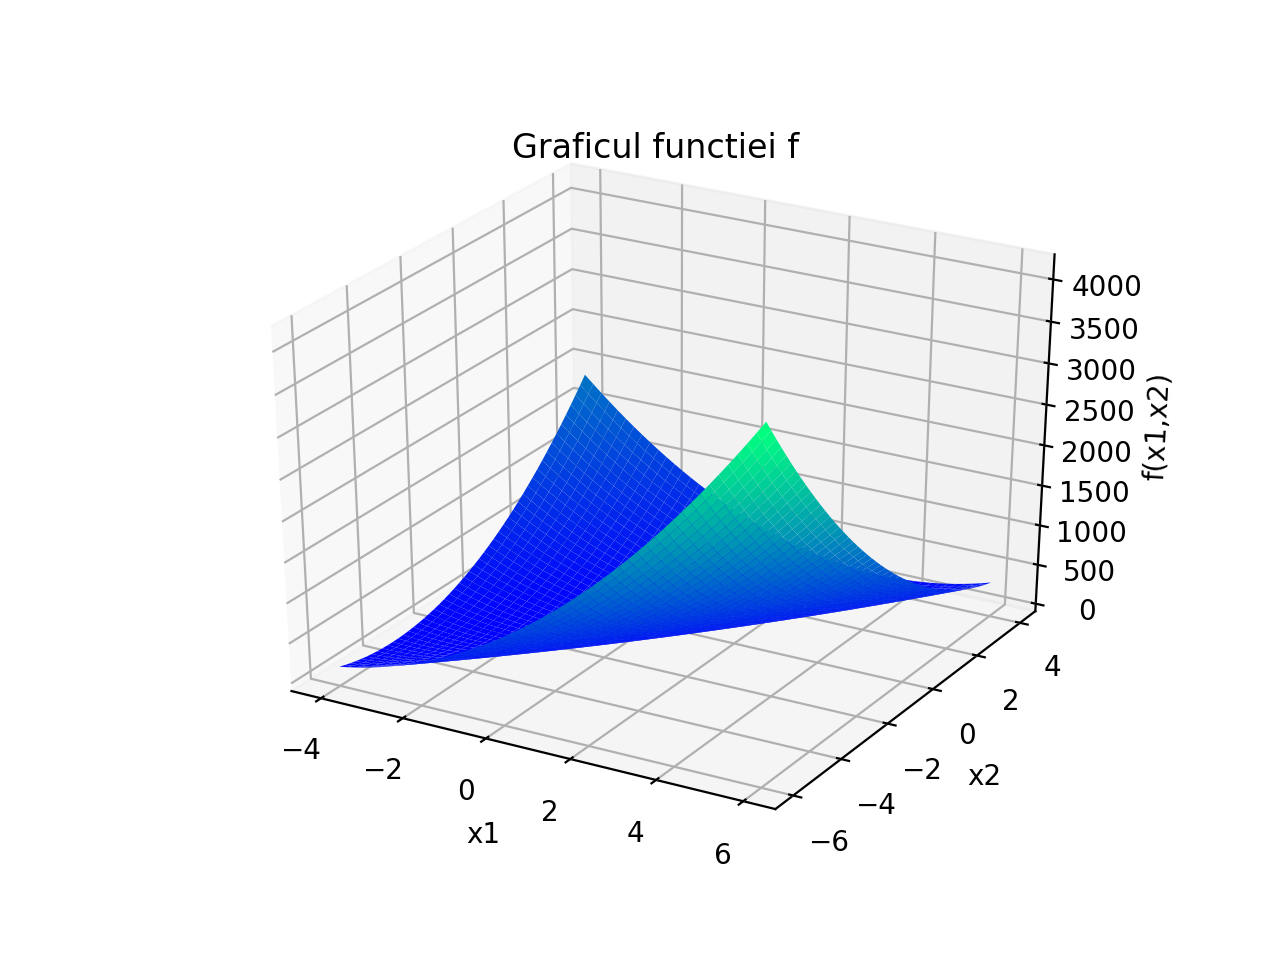

<IPython.core.display.Javascript object>


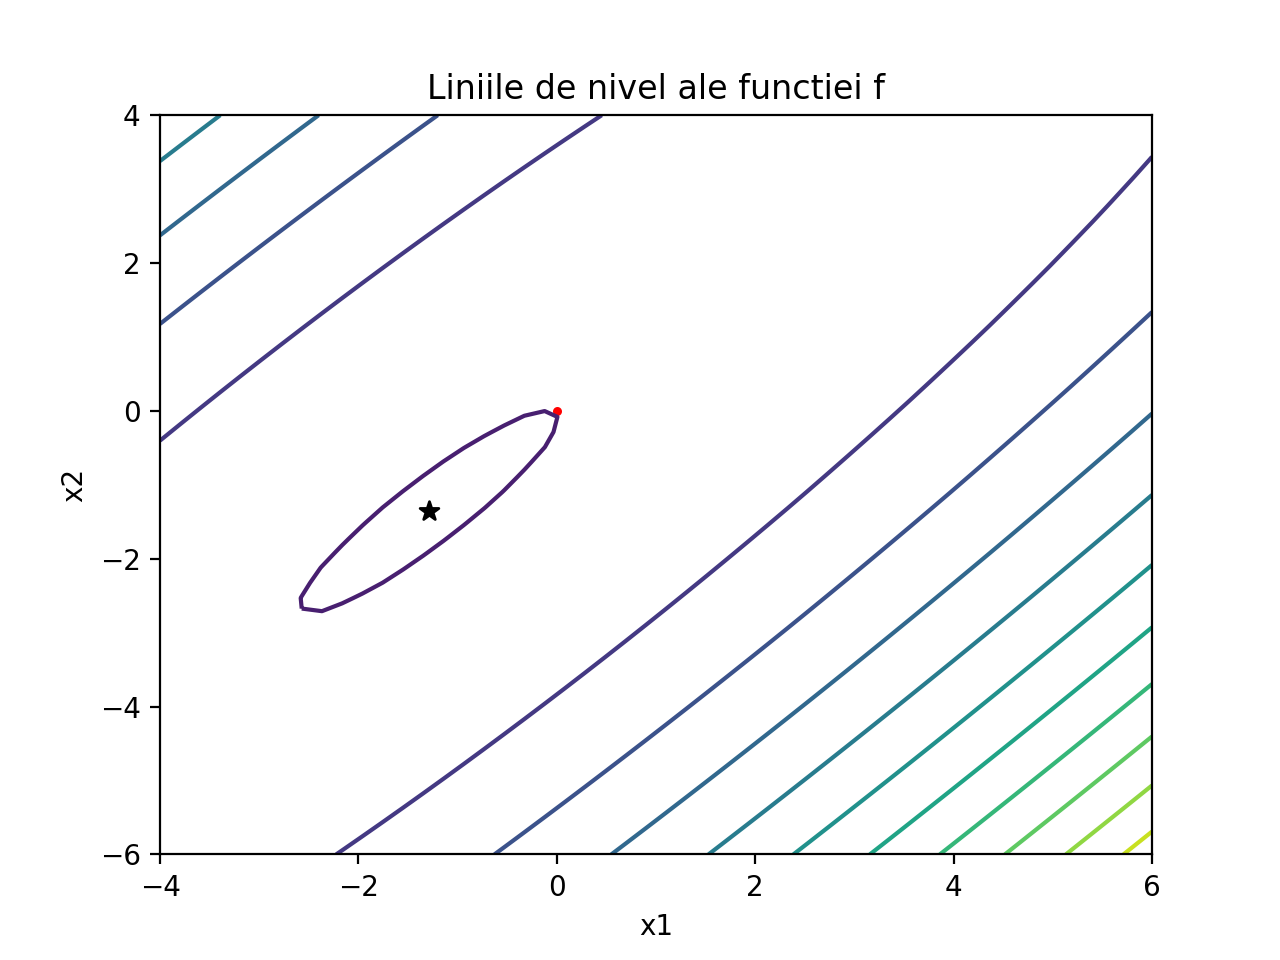

<IPython.core.display.Javascript object>


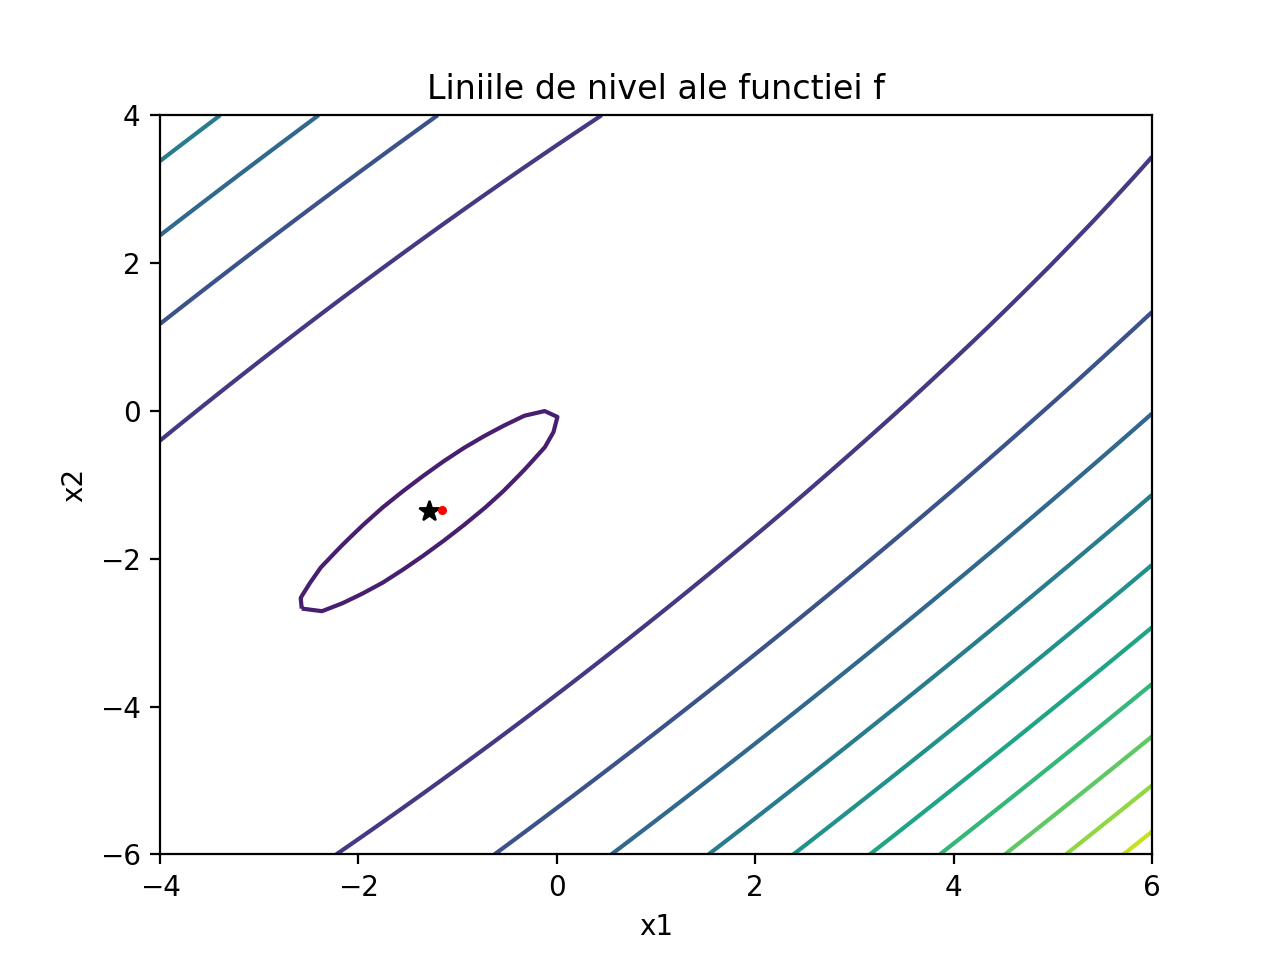

<IPython.core.display.Javascript object>


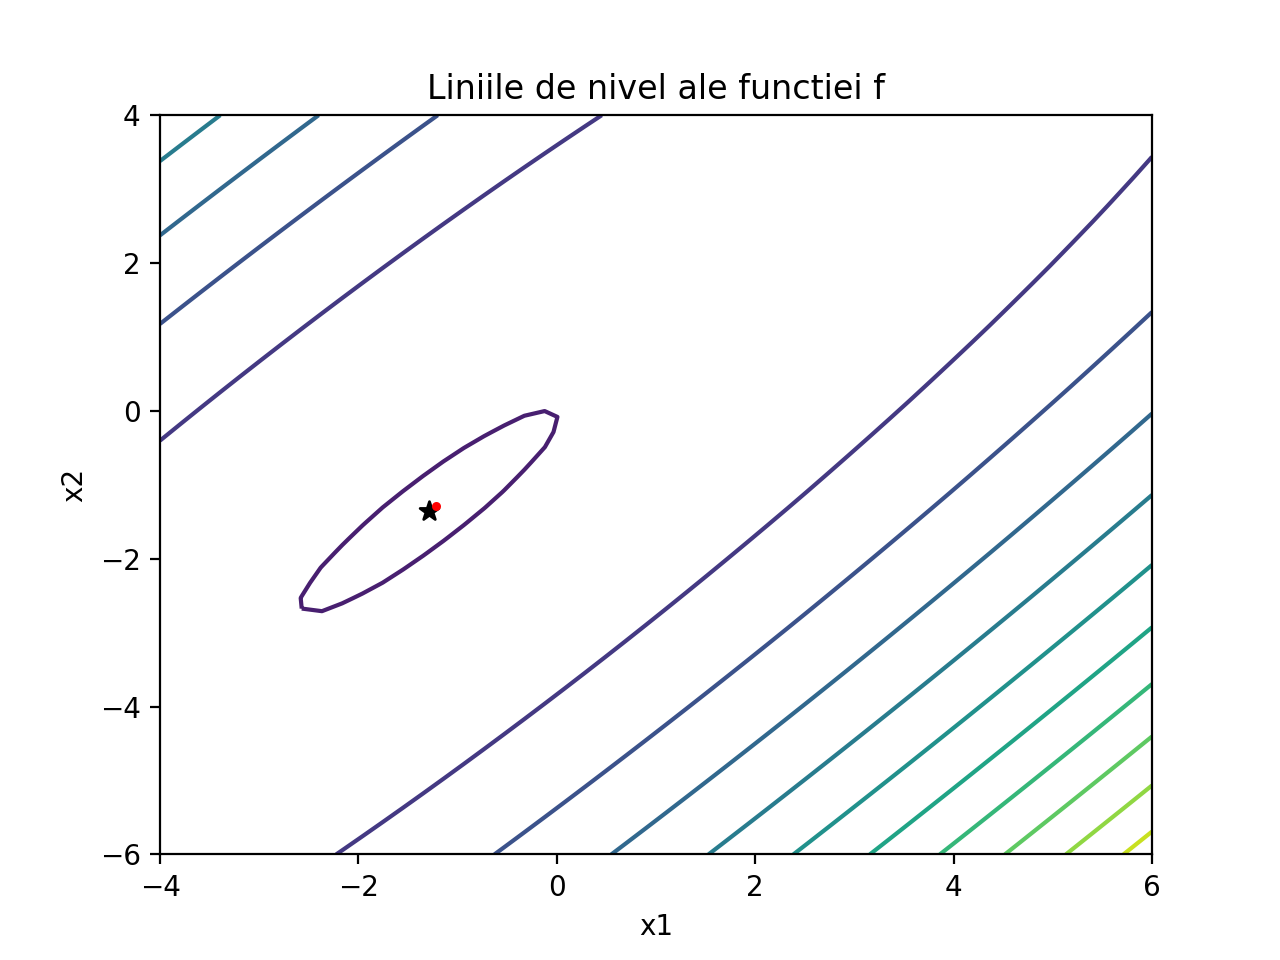

<IPython.core.display.Javascript object>


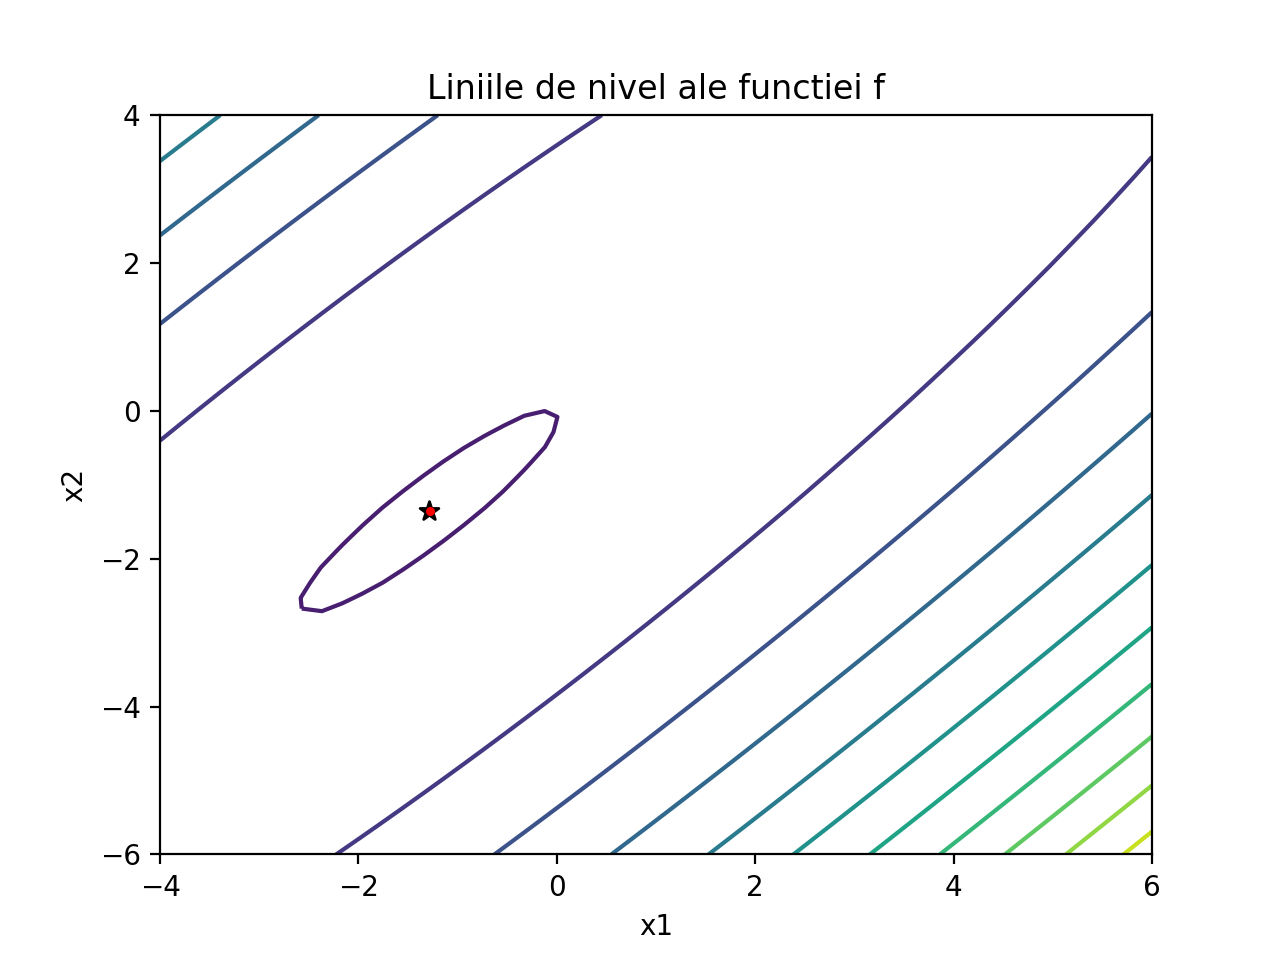

<IPython.core.display.Javascript object>


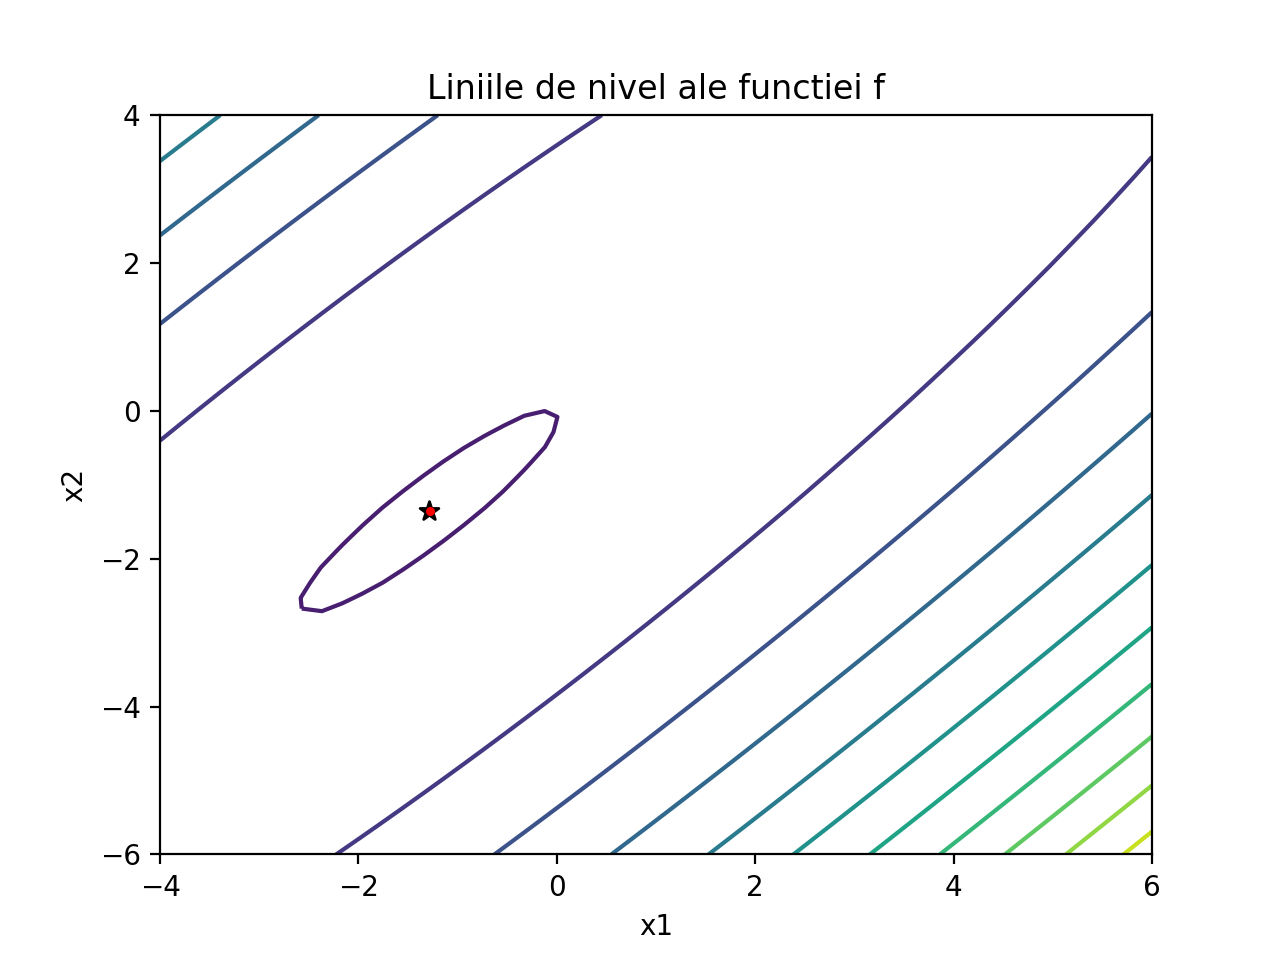

<IPython.core.display.Javascript object>


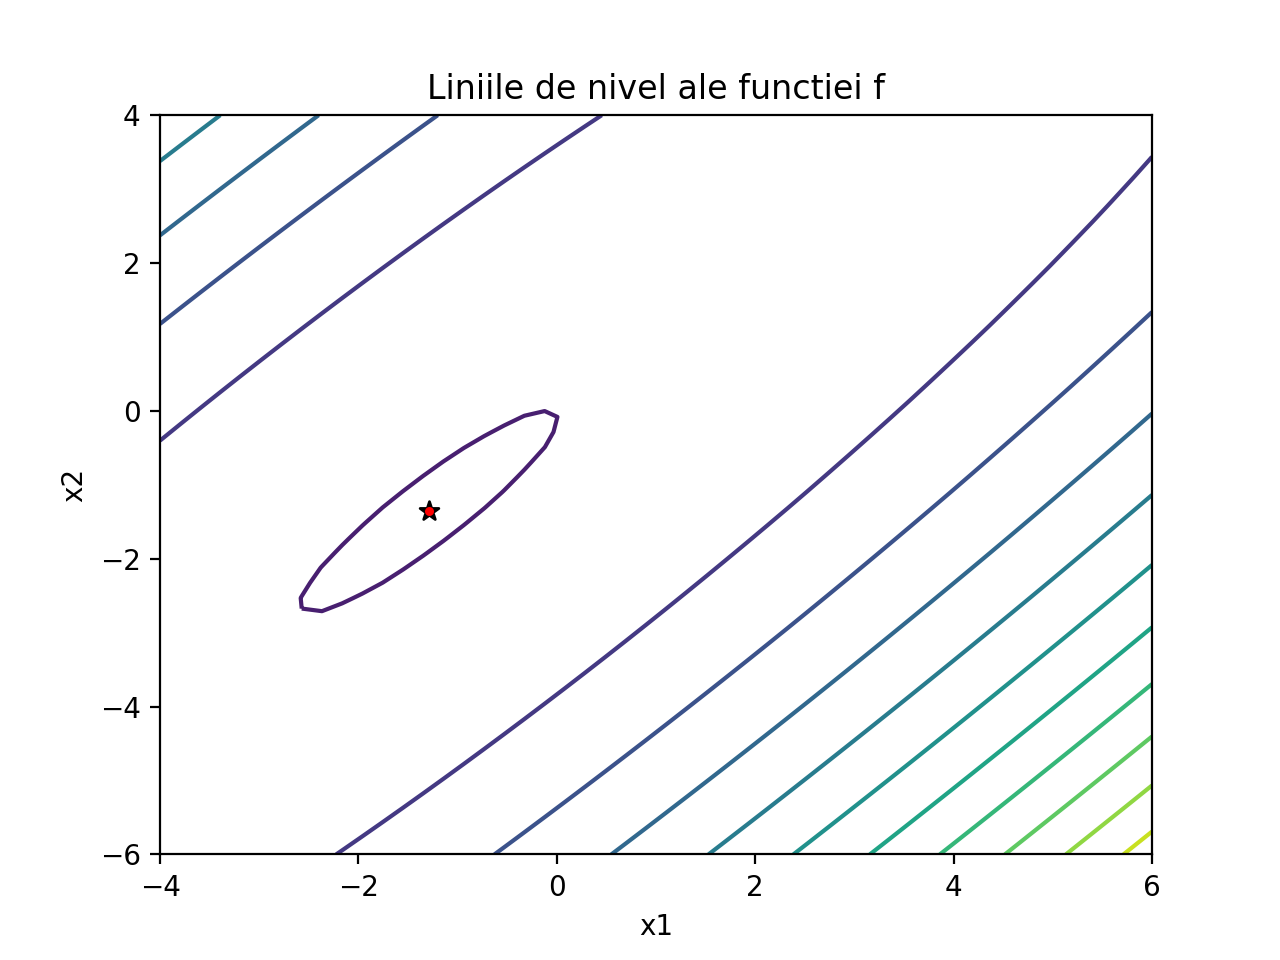

<IPython.core.display.Javascript object>


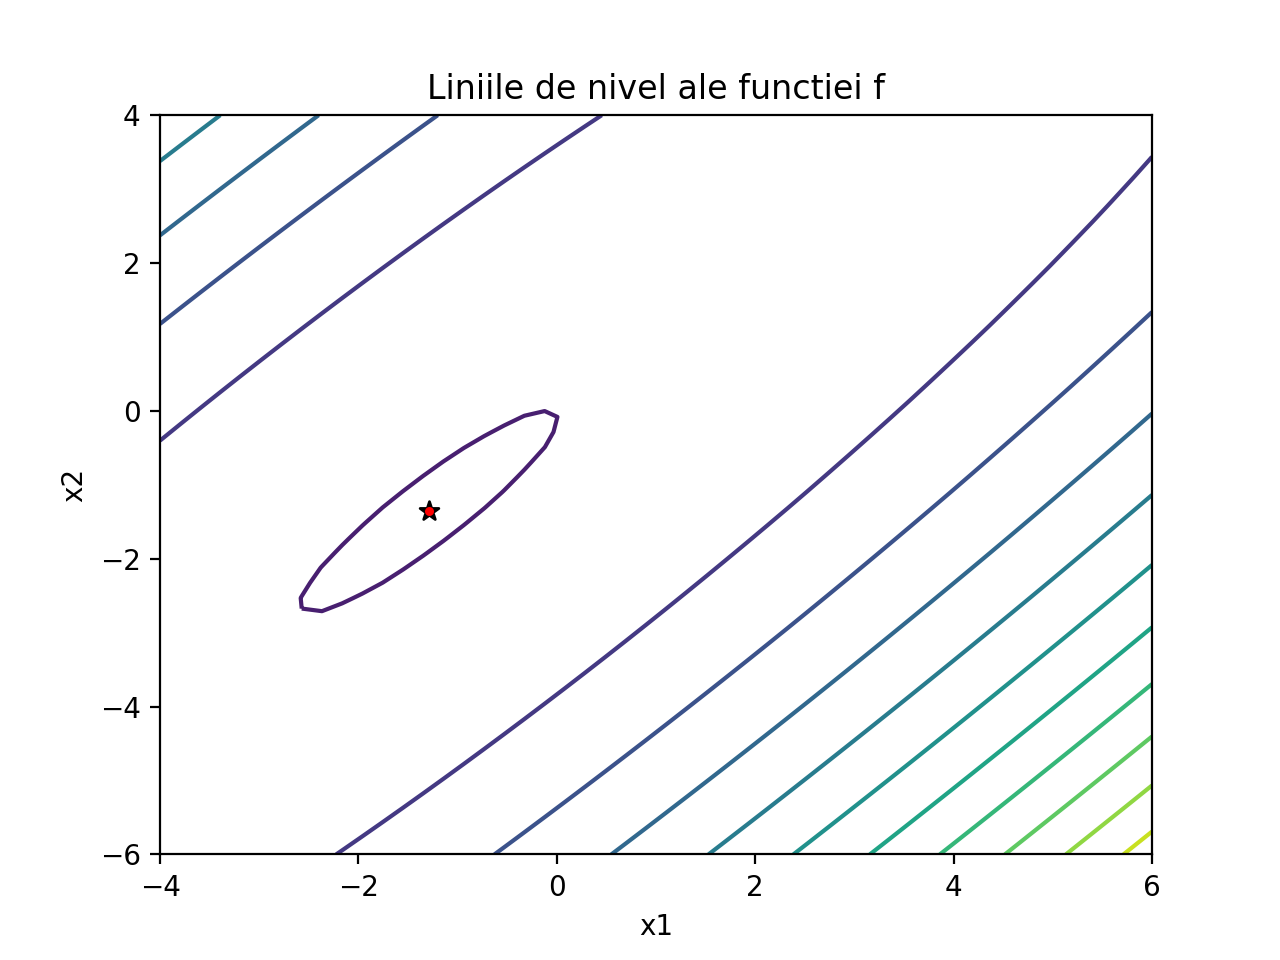

<IPython.core.display.Javascript object>


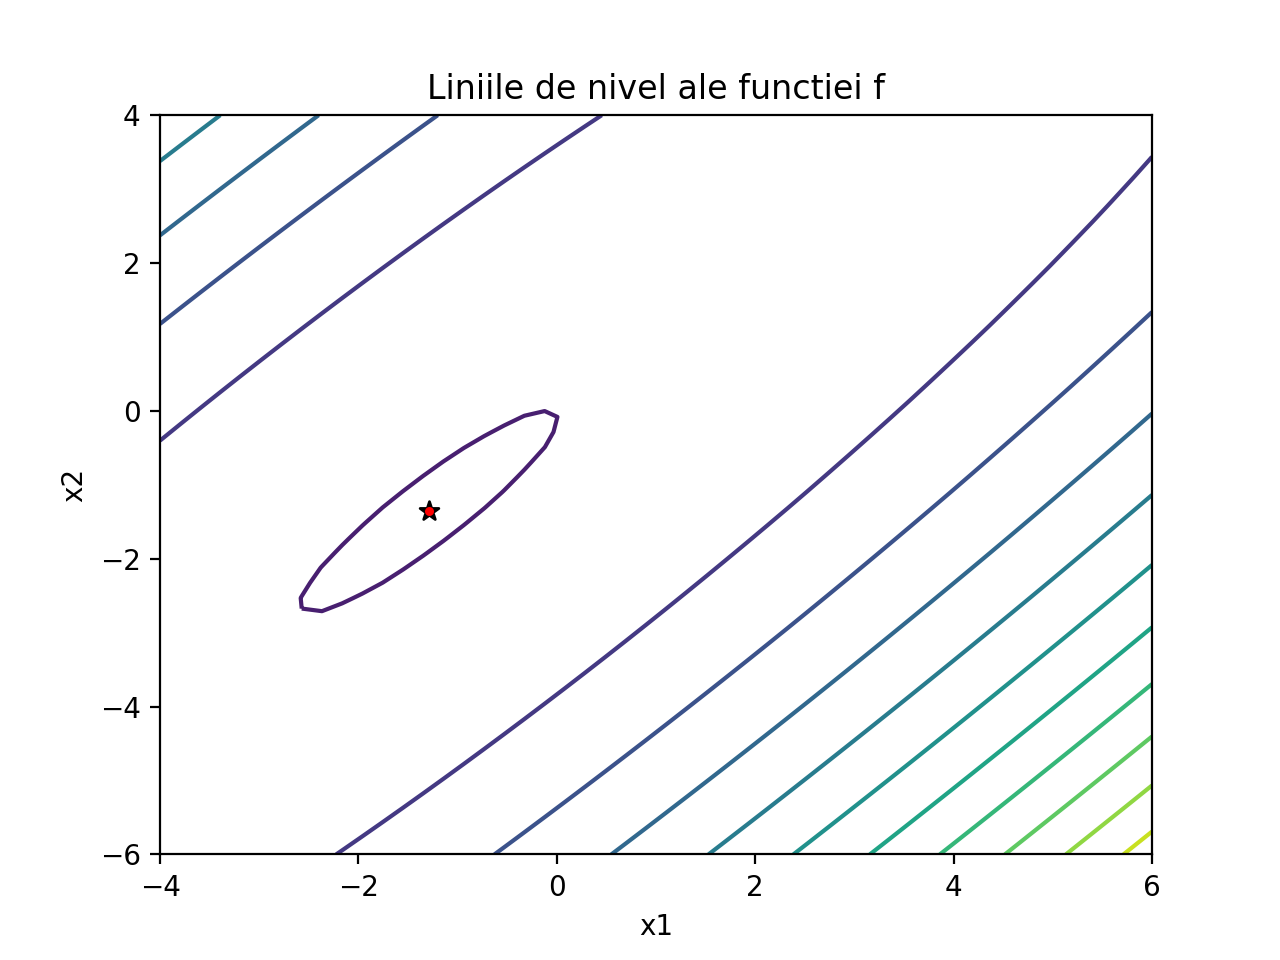

<IPython.core.display.Javascript object>


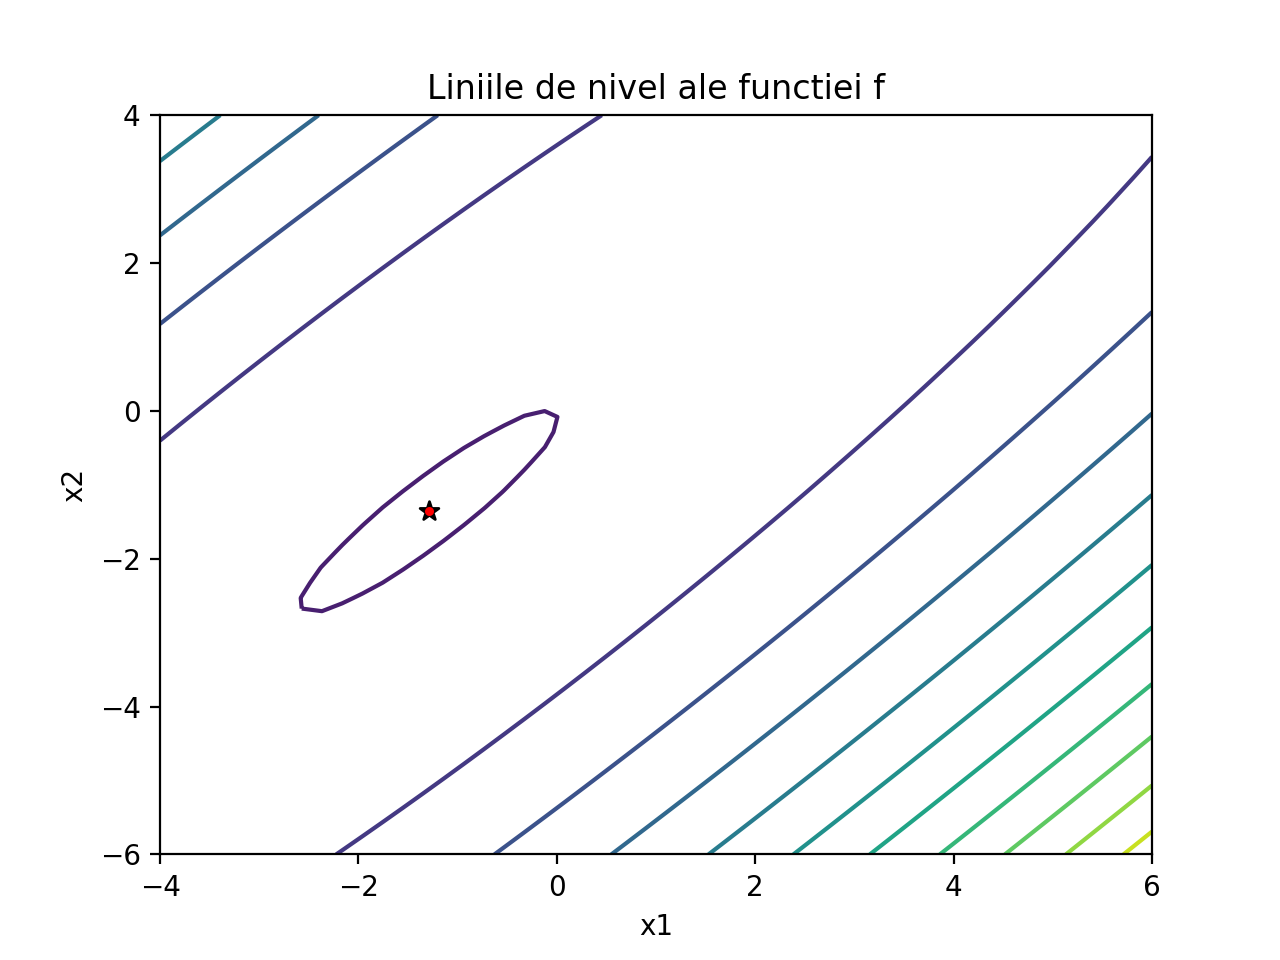

<IPython.core.display.Javascript object>


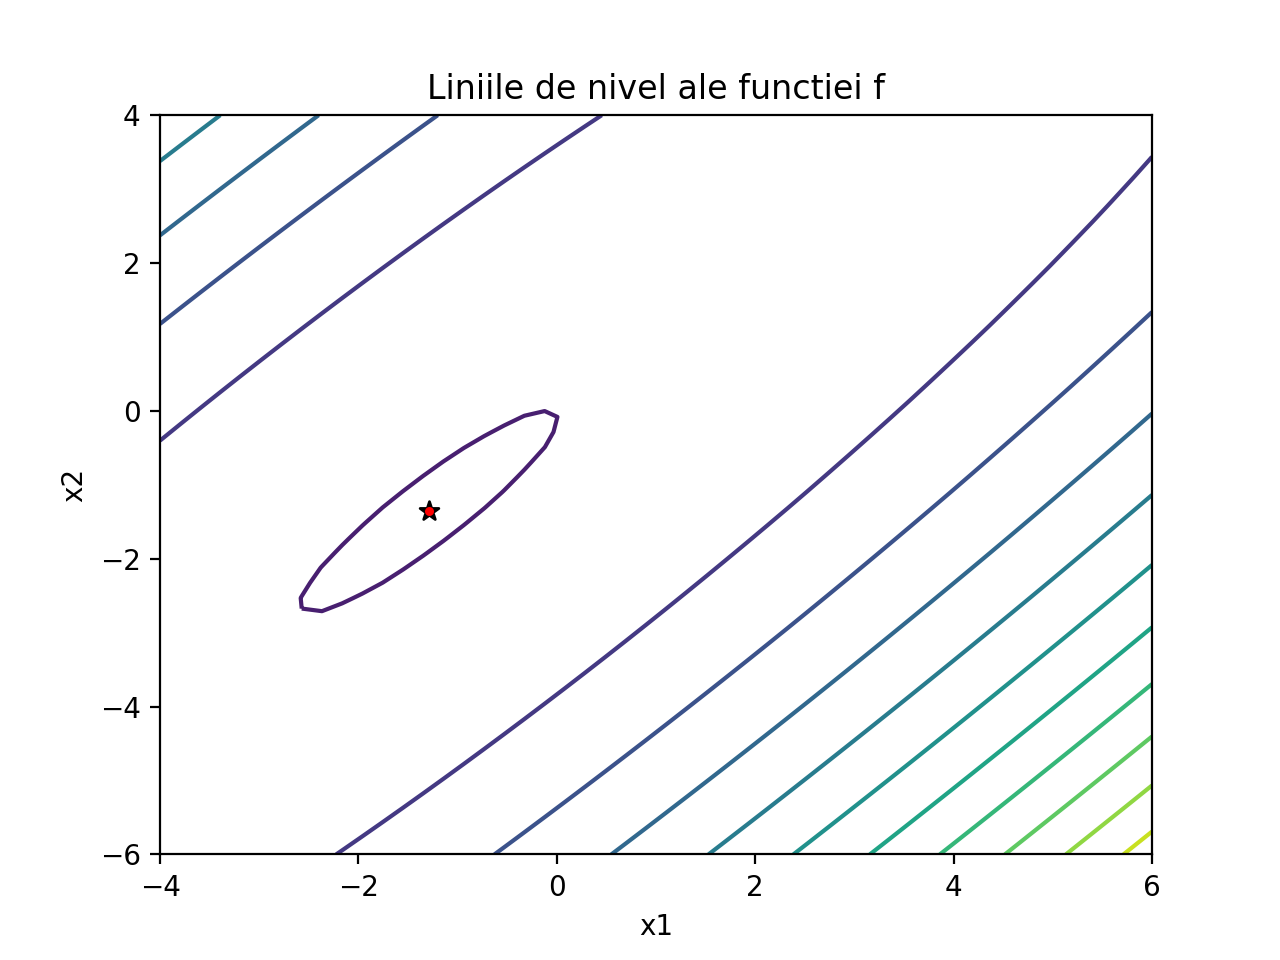

<IPython.core.display.Javascript object>


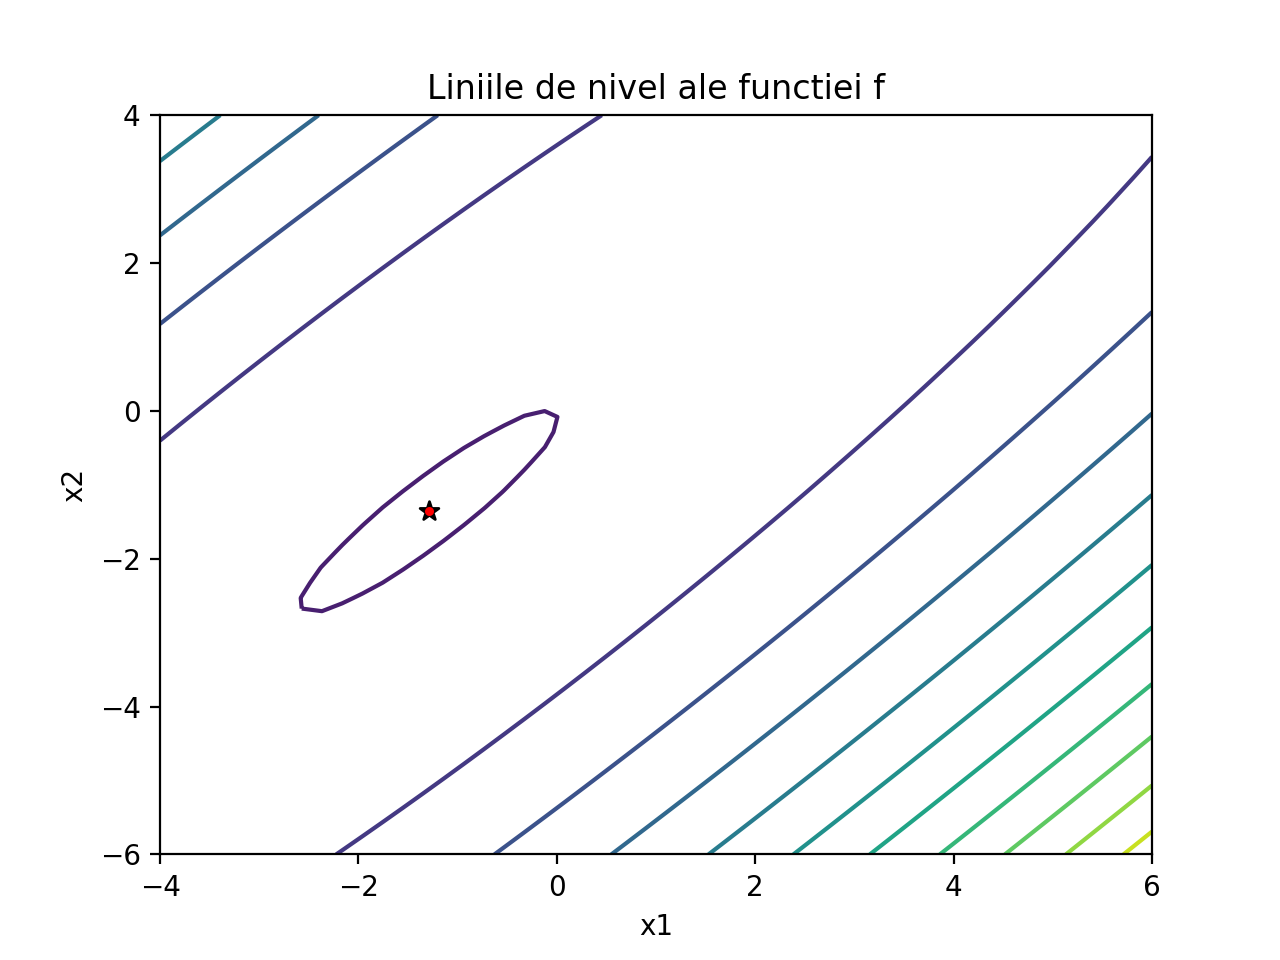

<IPython.core.display.Javascript object>


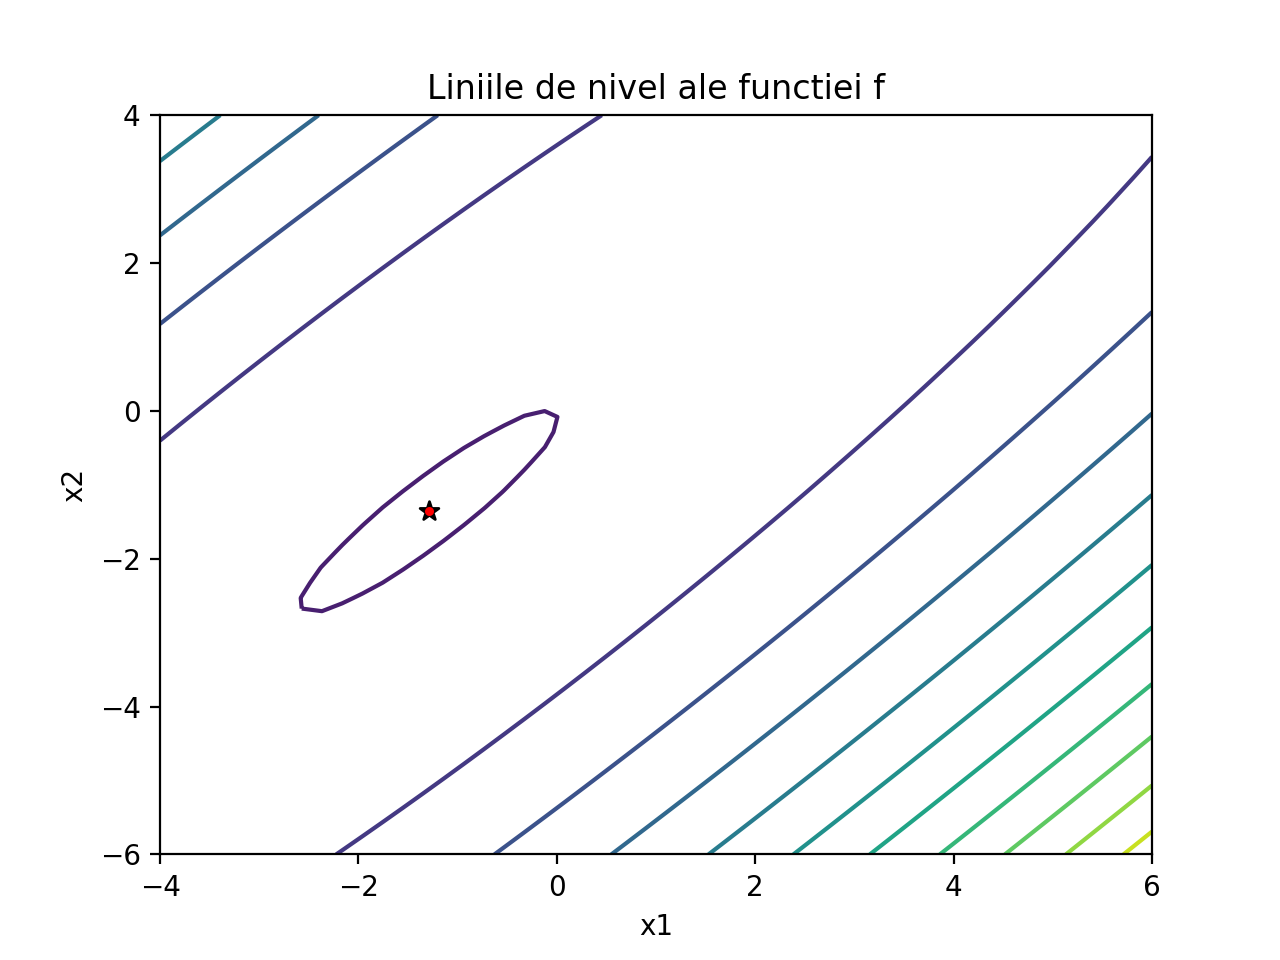

<IPython.core.display.Javascript object>


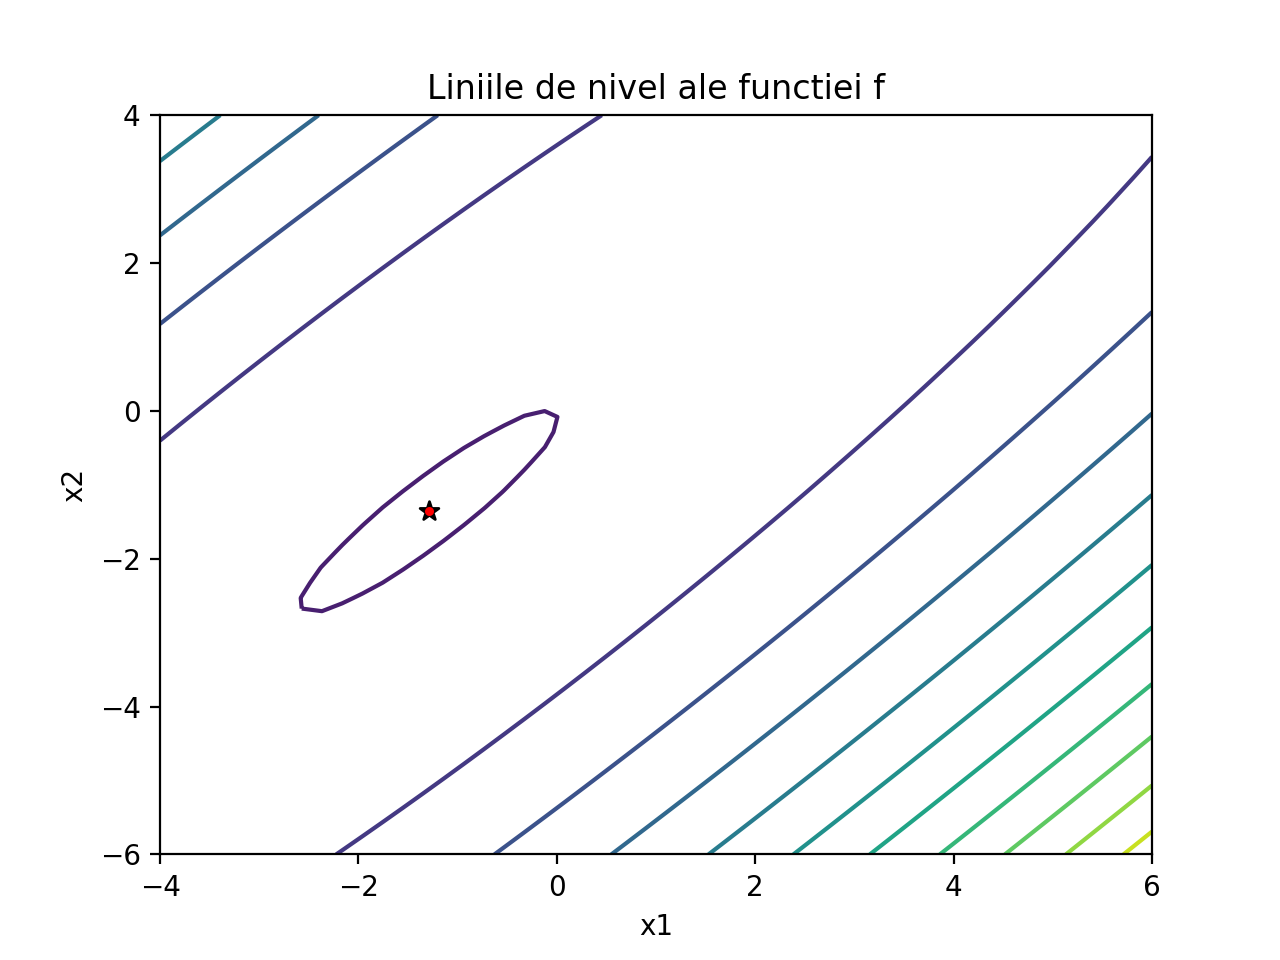

<IPython.core.display.Javascript object>


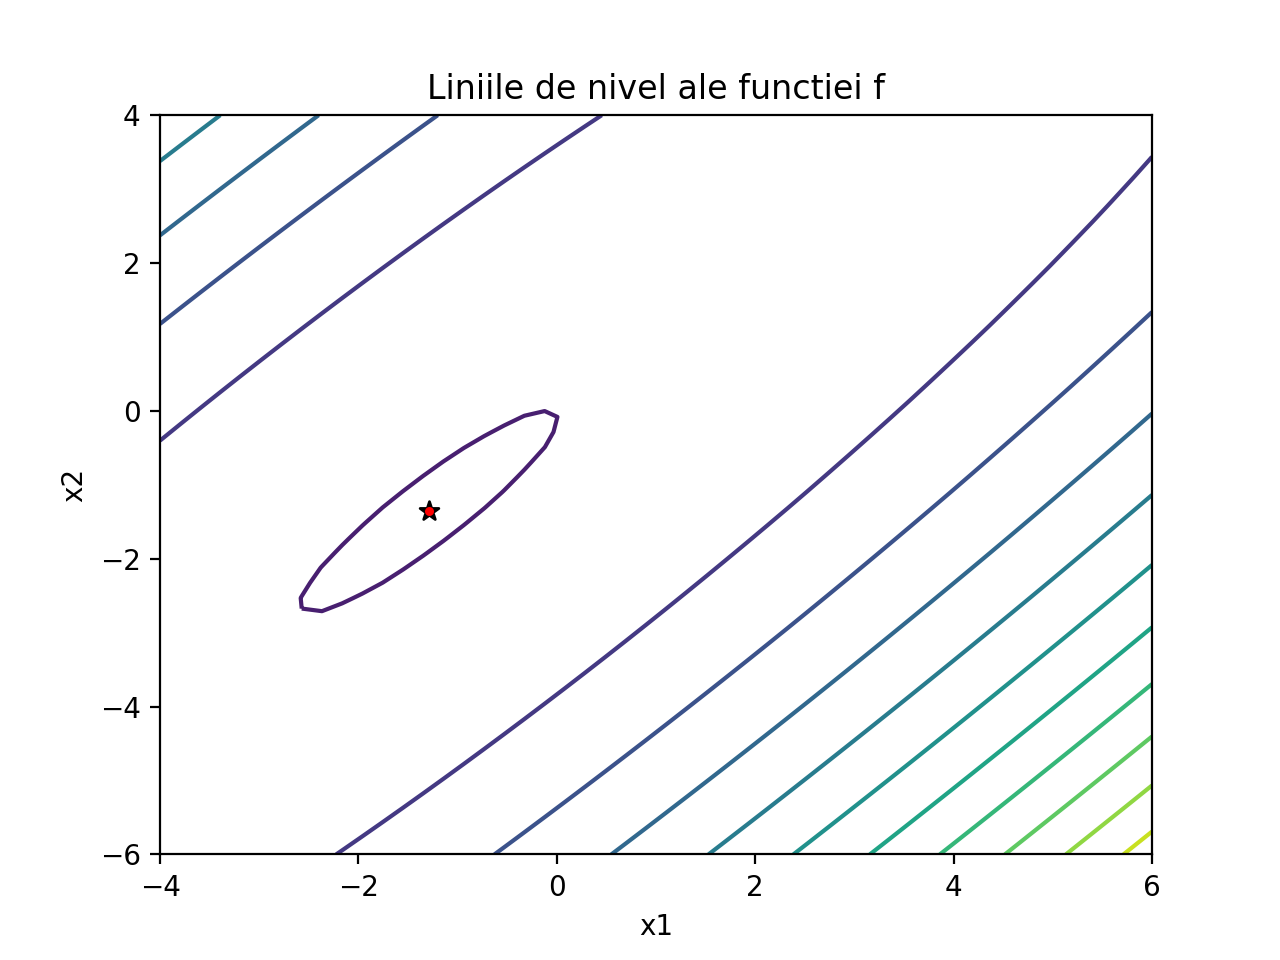

<IPython.core.display.Javascript object>


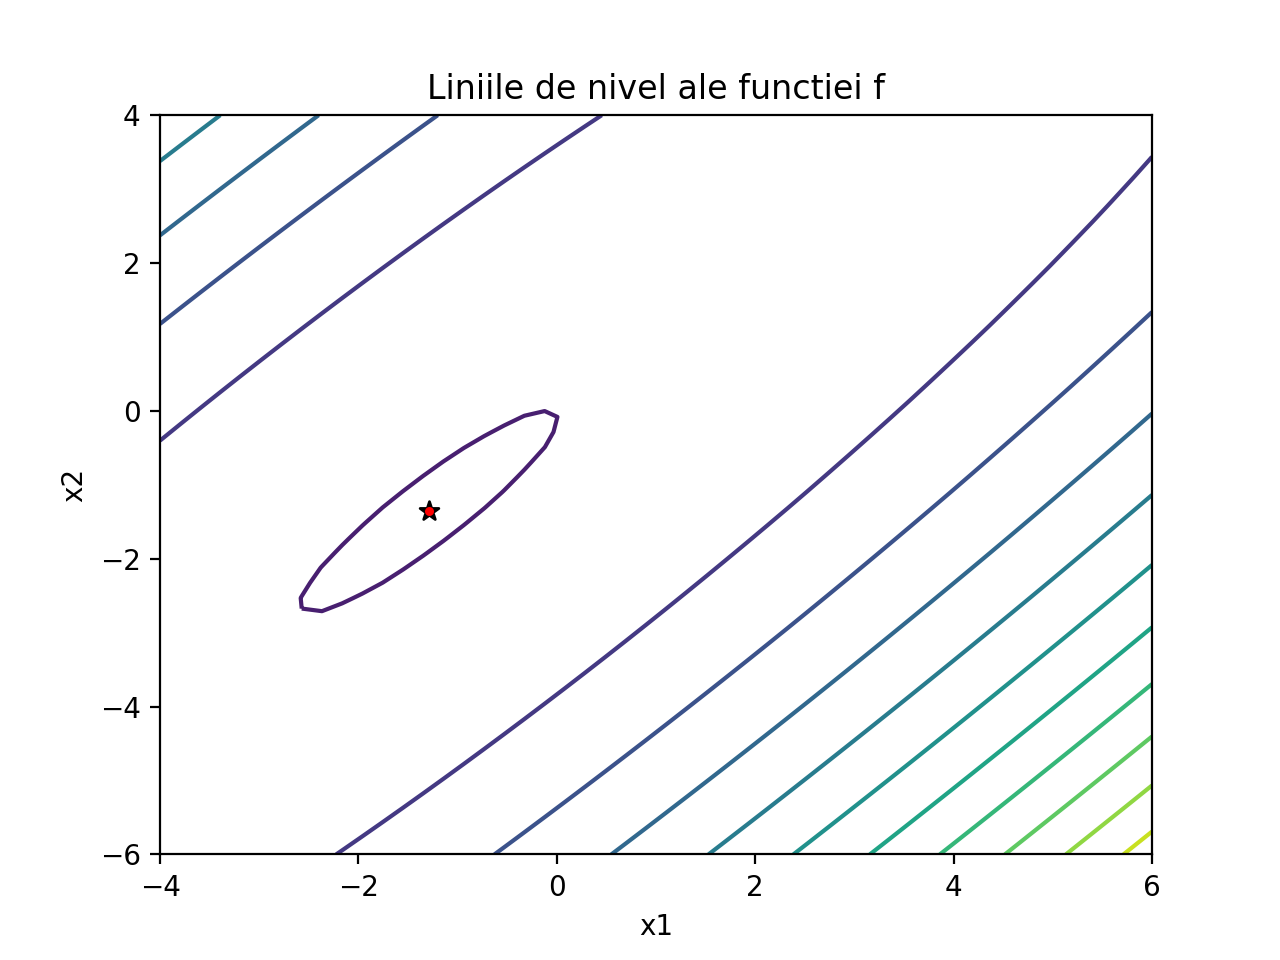

<IPython.core.display.Javascript object>


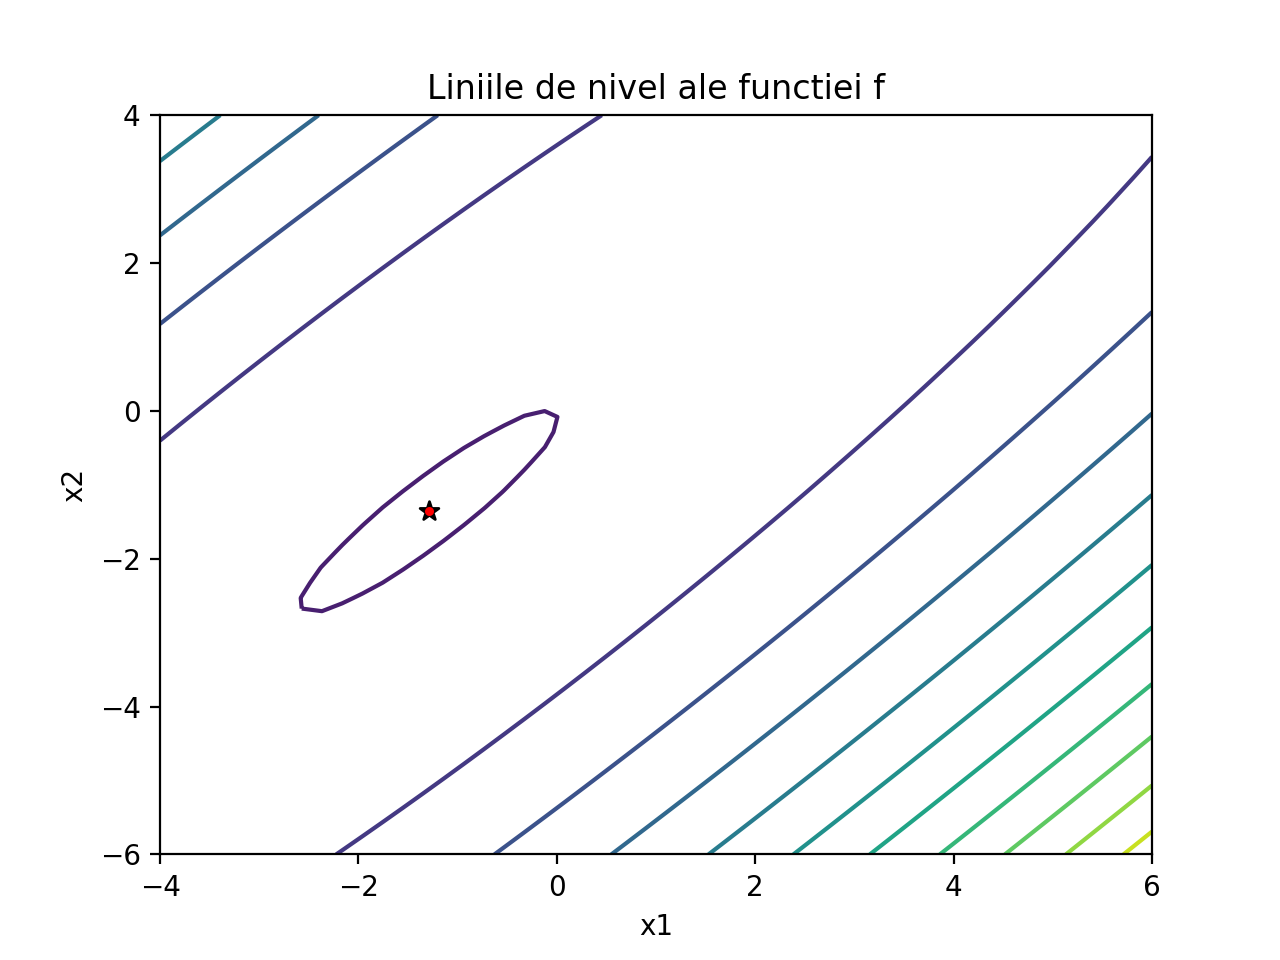

<IPython.core.display.Javascript object>


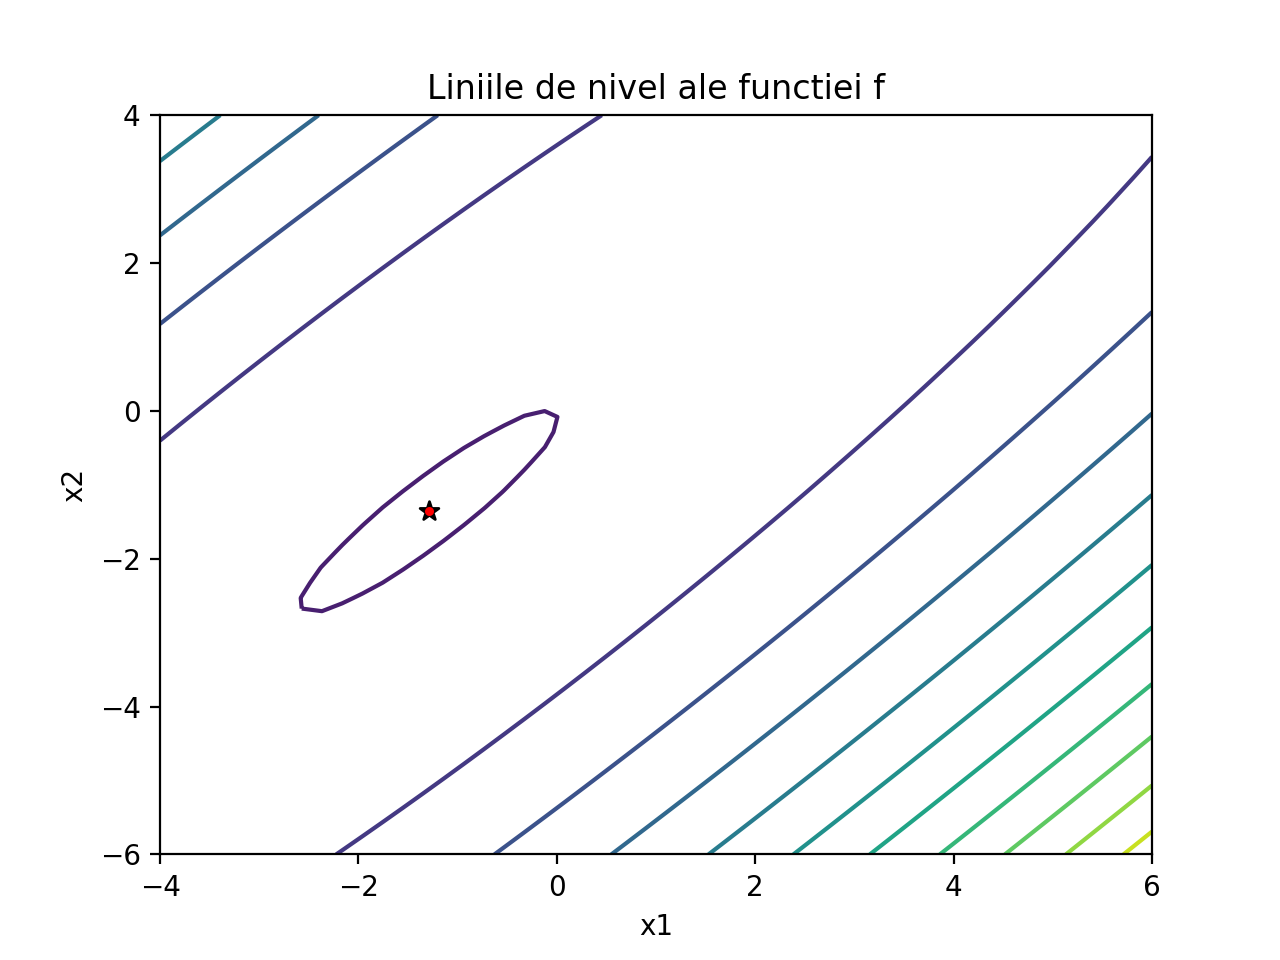

<IPython.core.display.Javascript object>


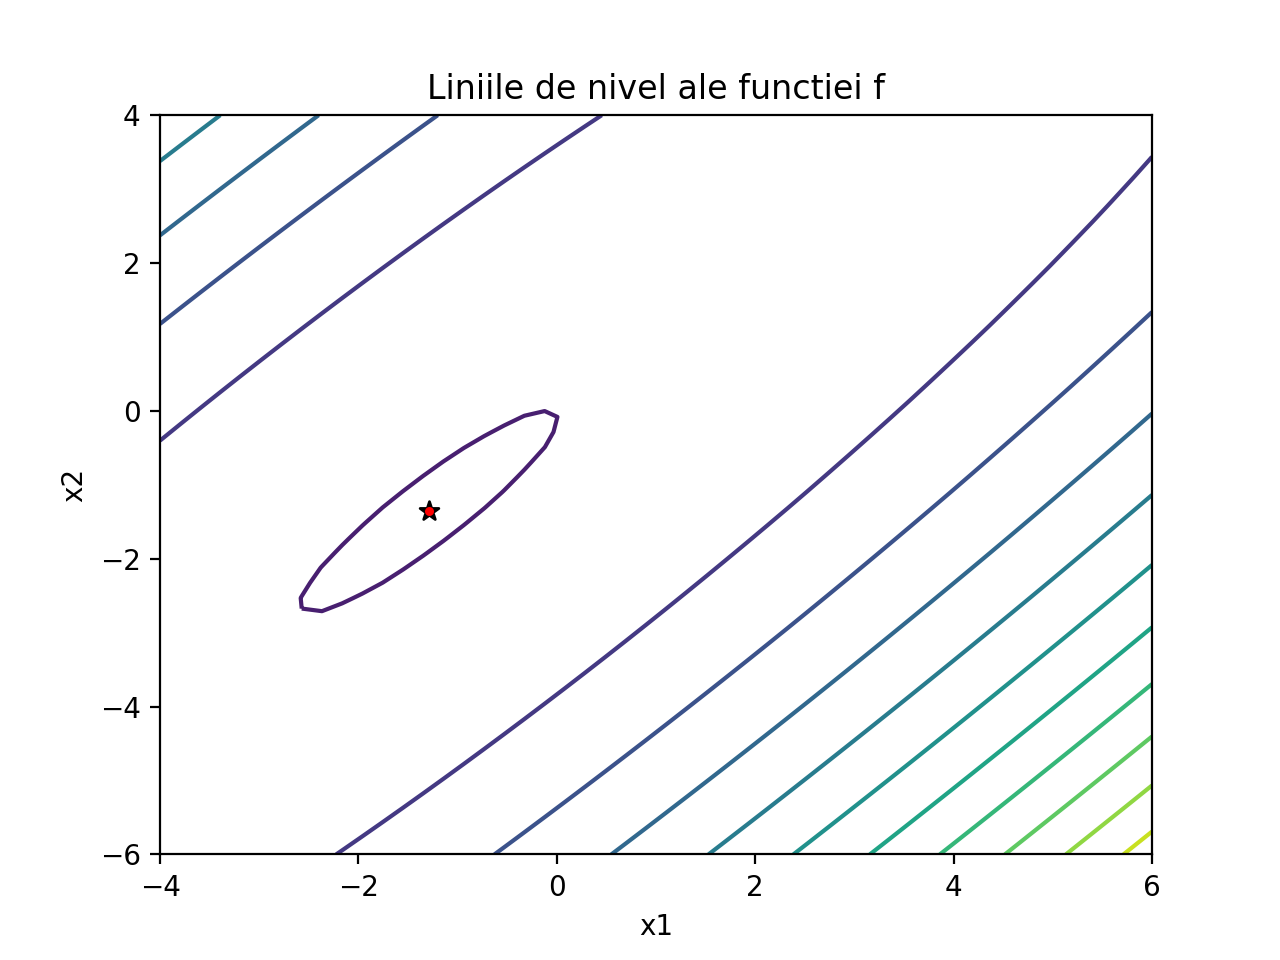

<IPython.core.display.Javascript object>


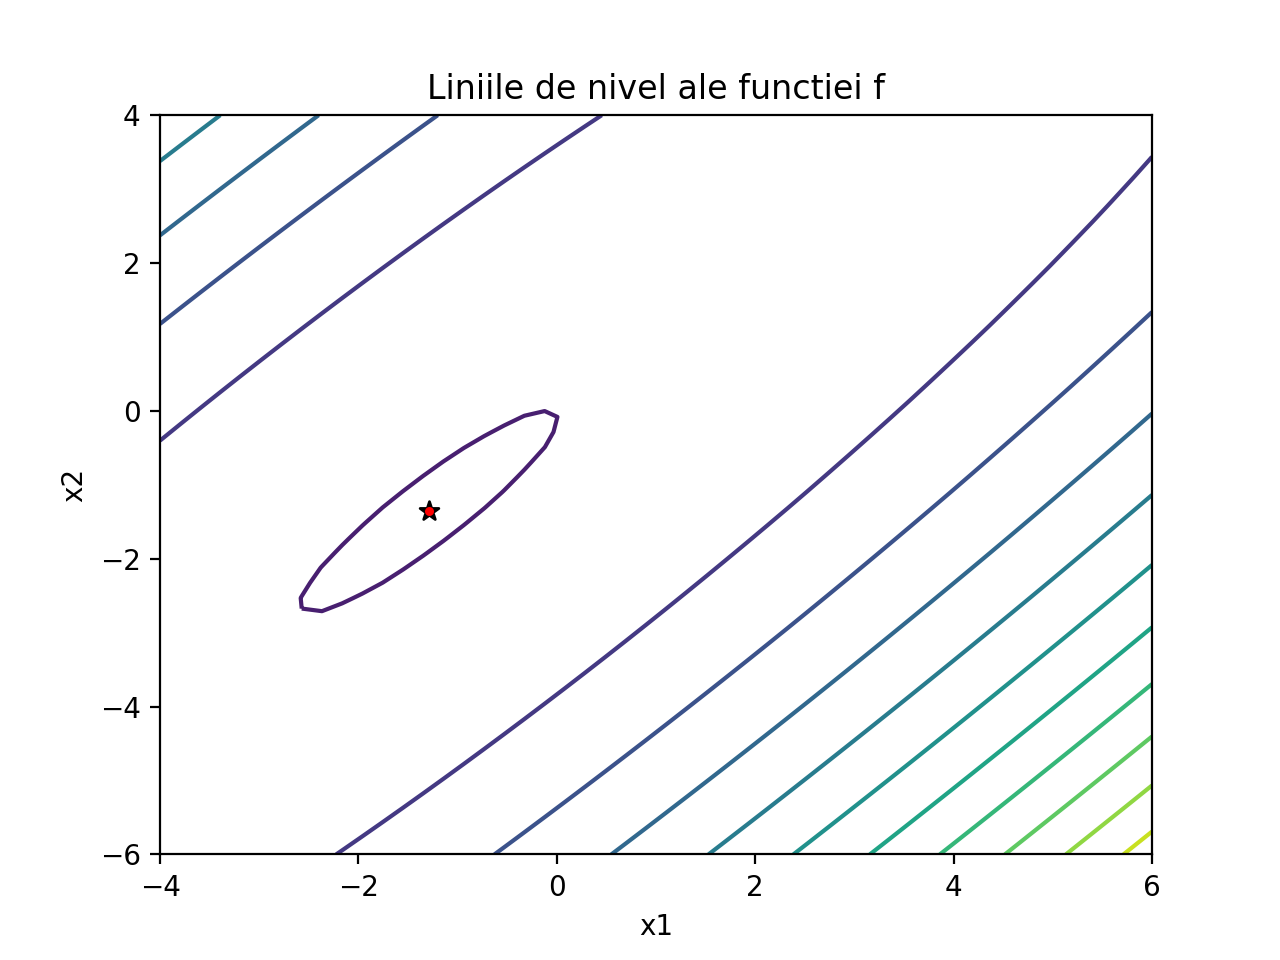

/Users/corinacondurachi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


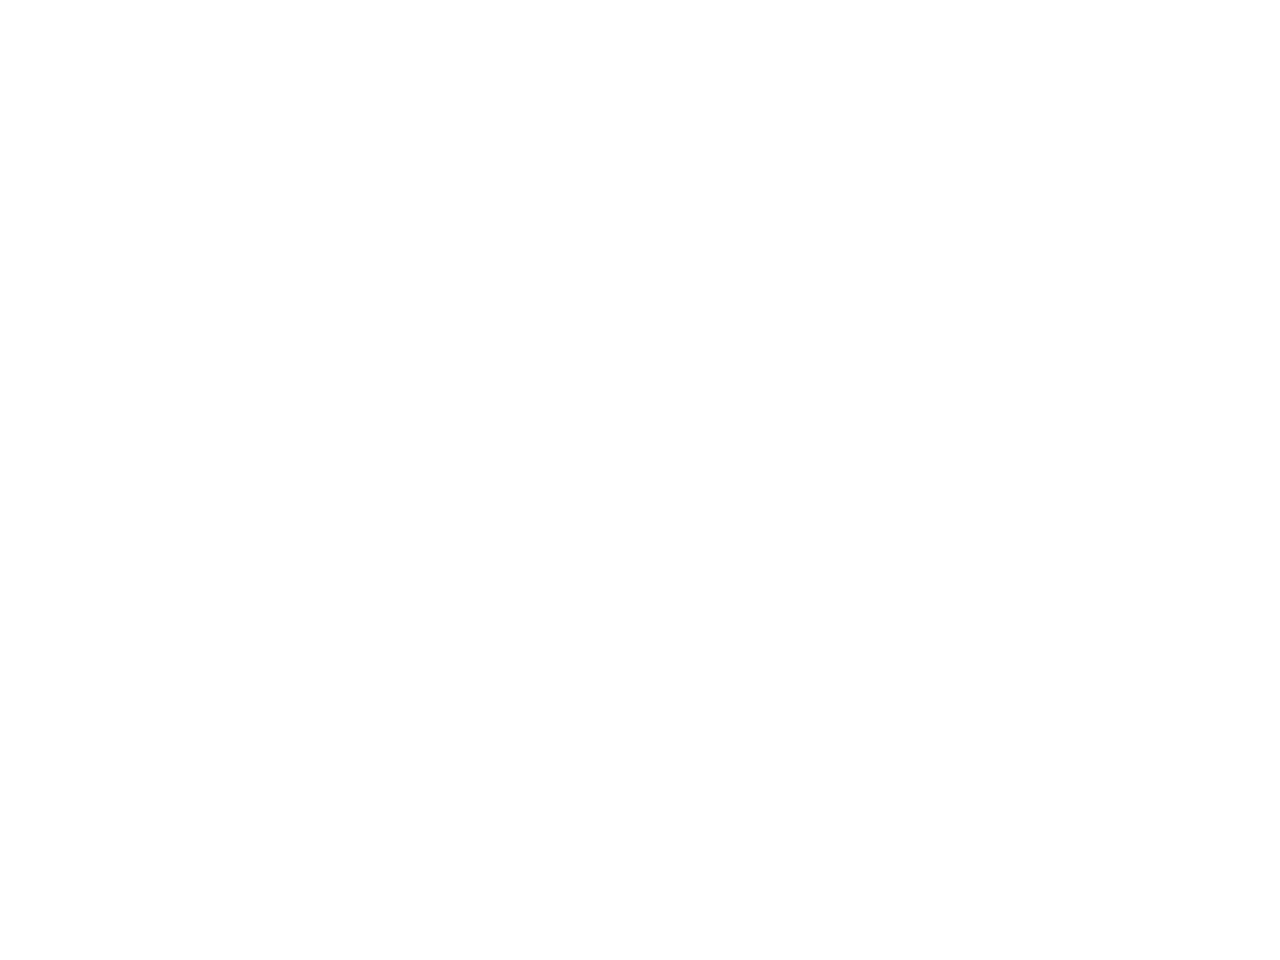

<IPython.core.display.Javascript object>


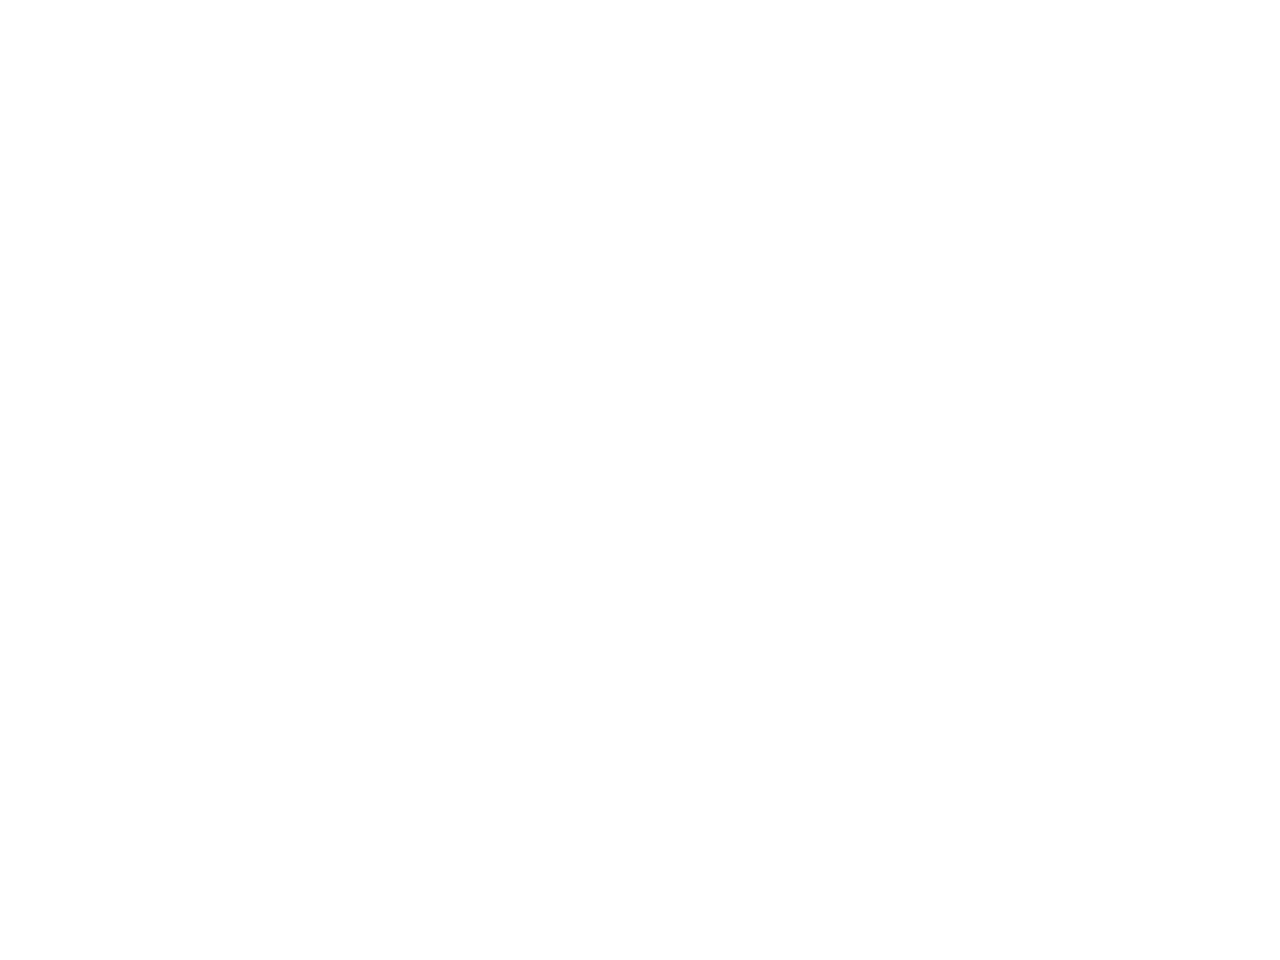

<IPython.core.display.Javascript object>


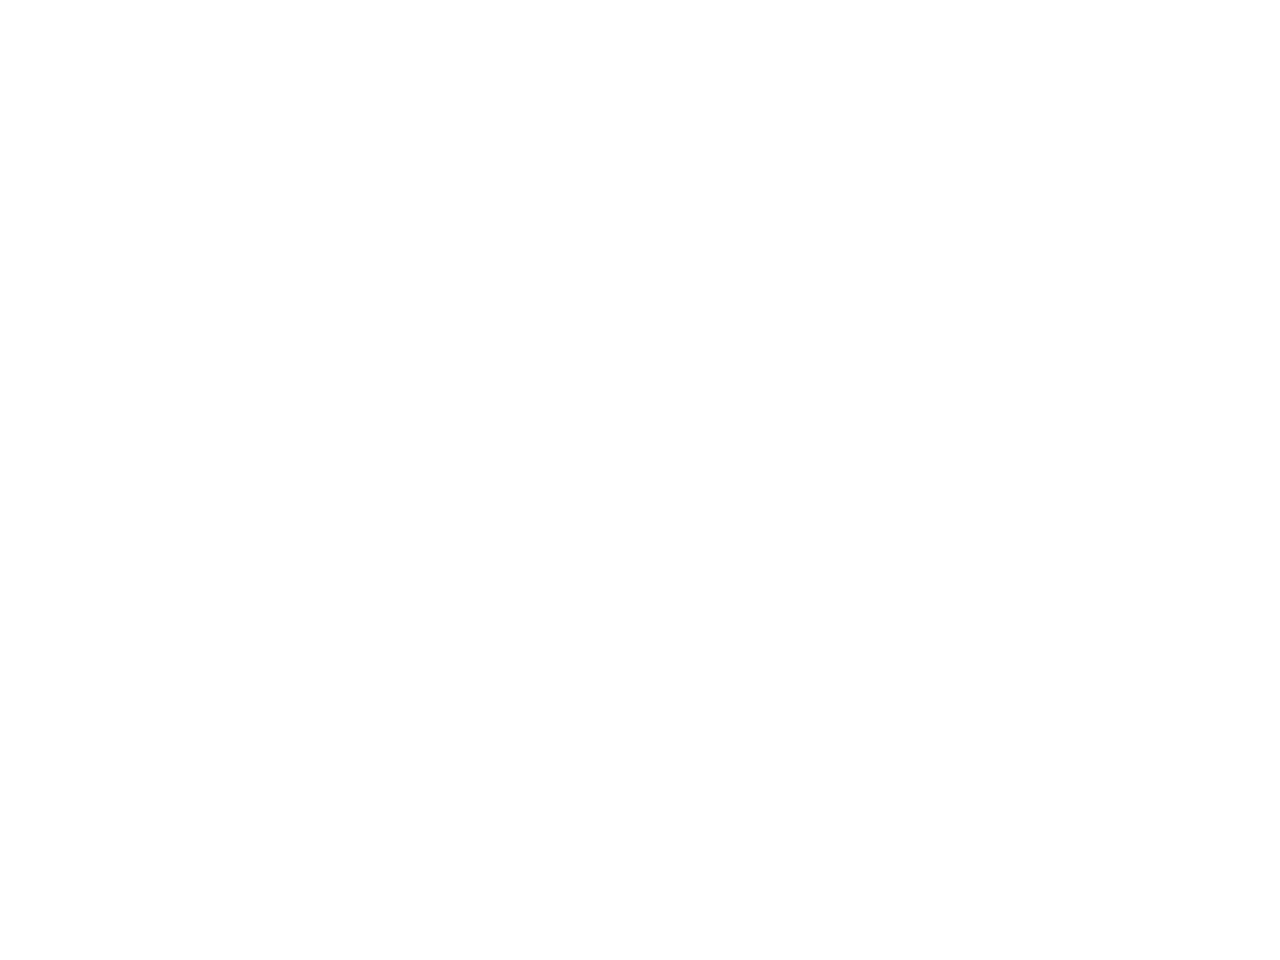

<IPython.core.display.Javascript object>


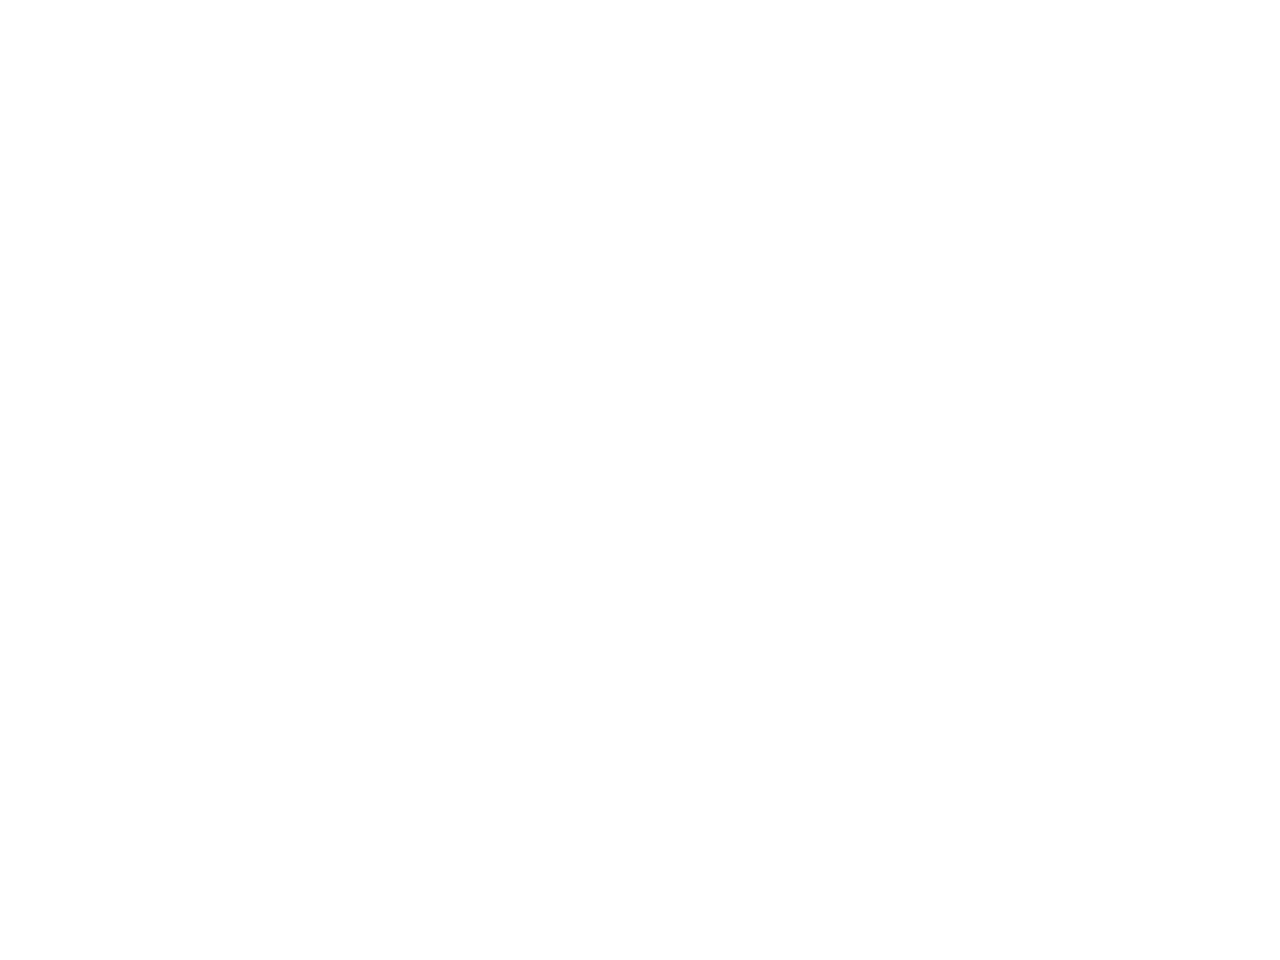

<IPython.core.display.Javascript object>


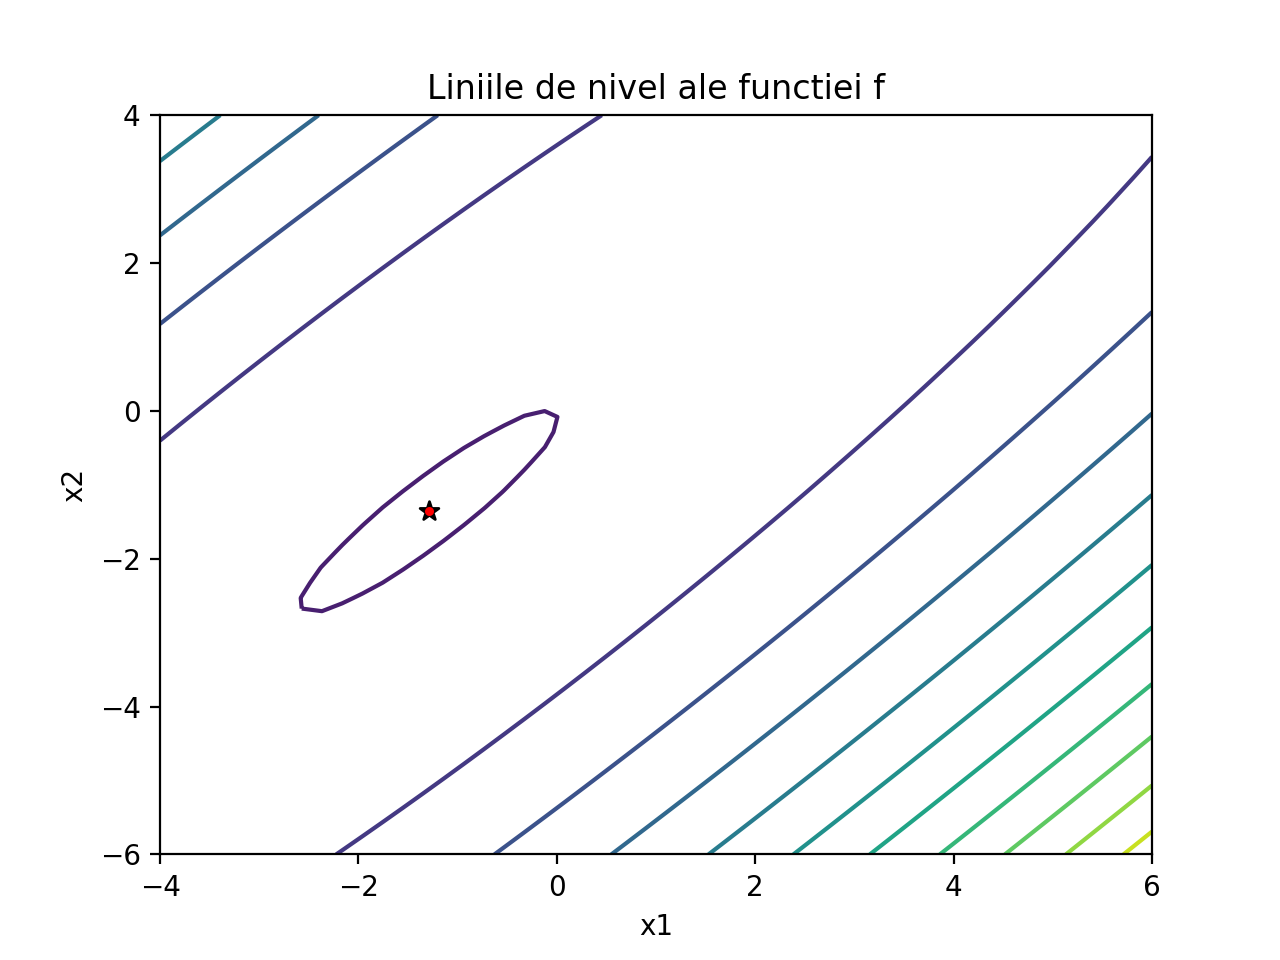

<IPython.core.display.Javascript object>


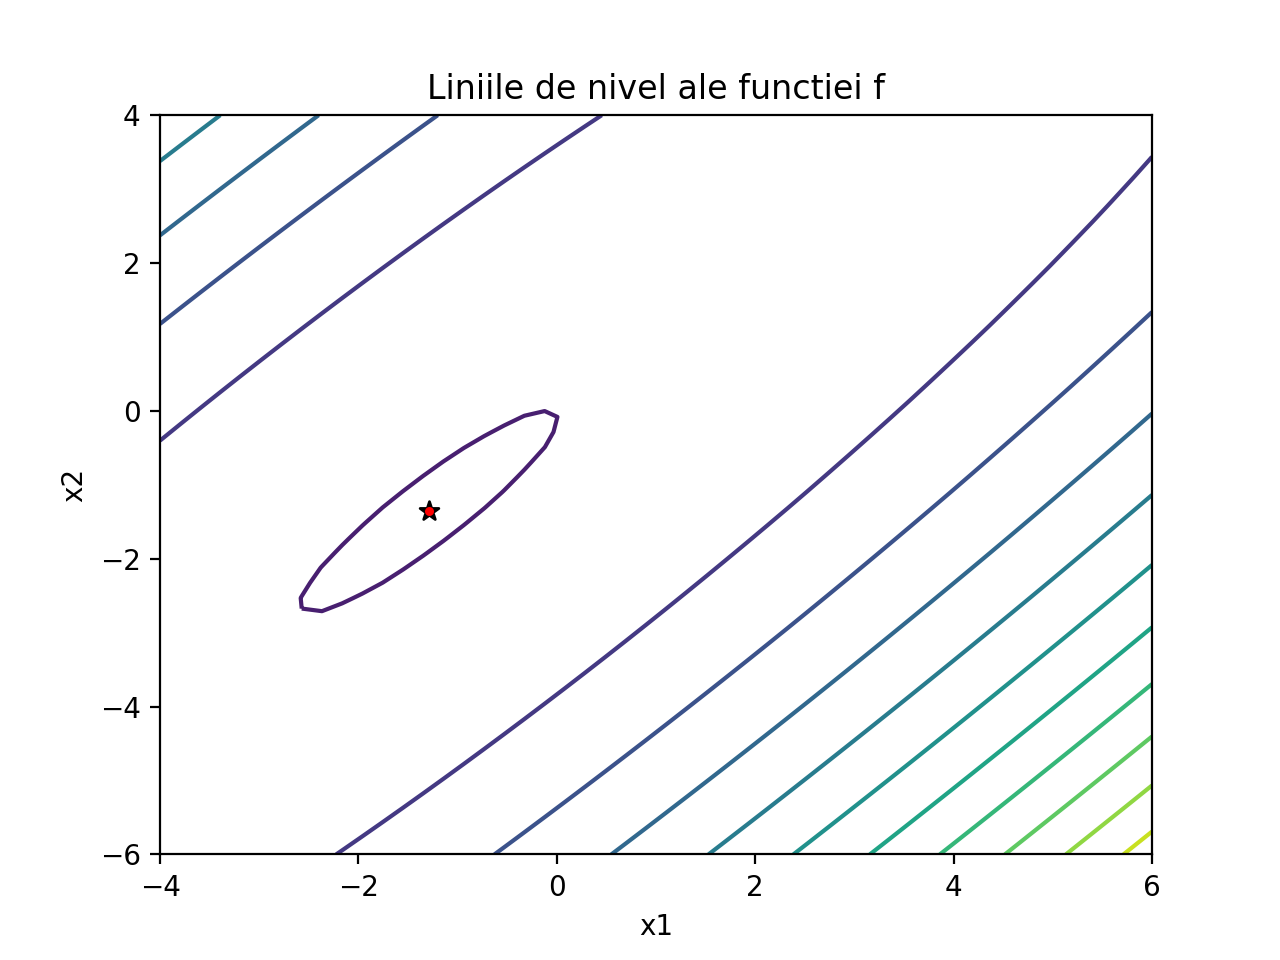

<IPython.core.display.Javascript object>


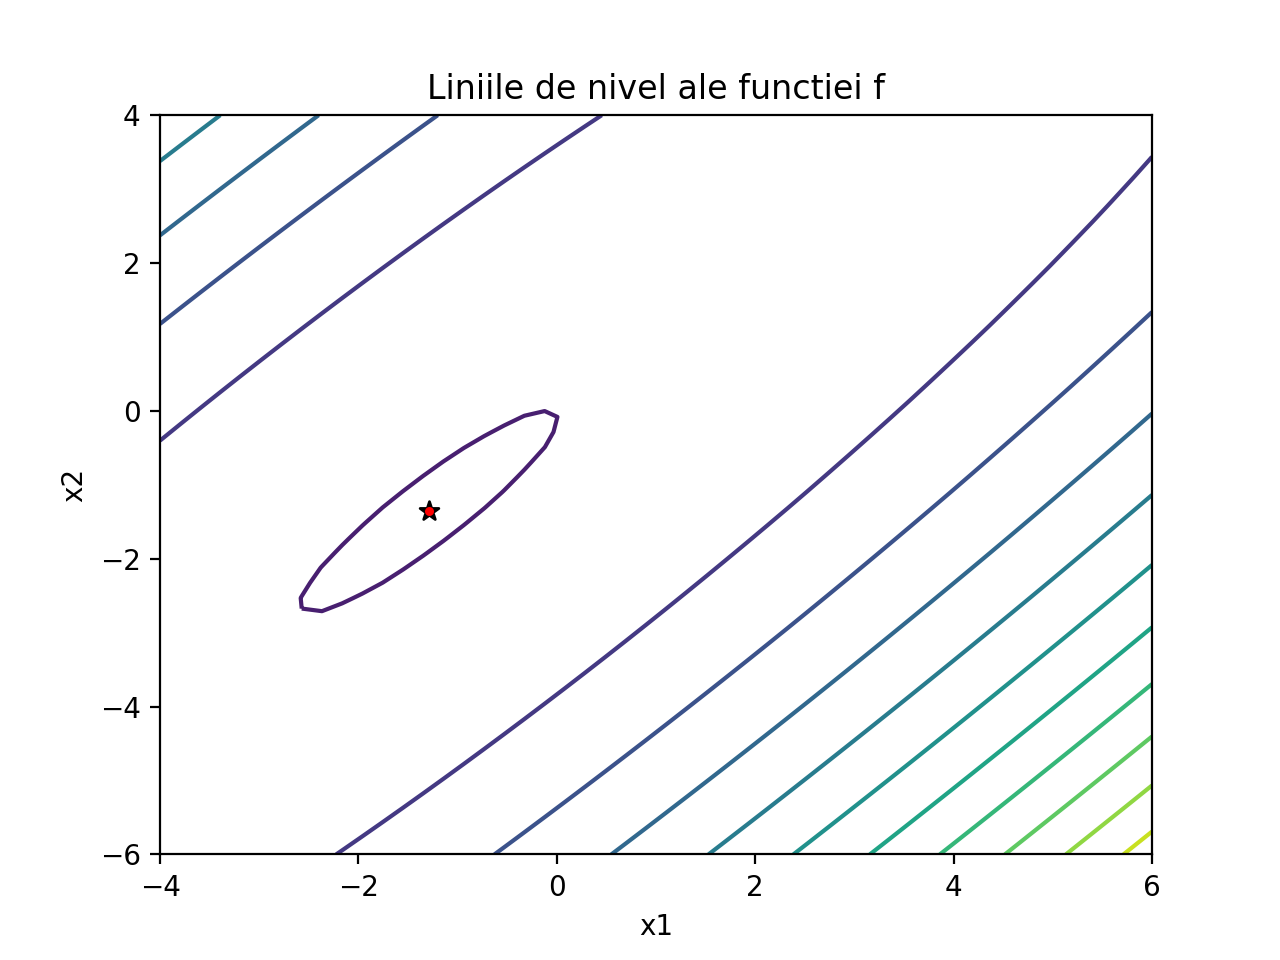

<IPython.core.display.Javascript object>


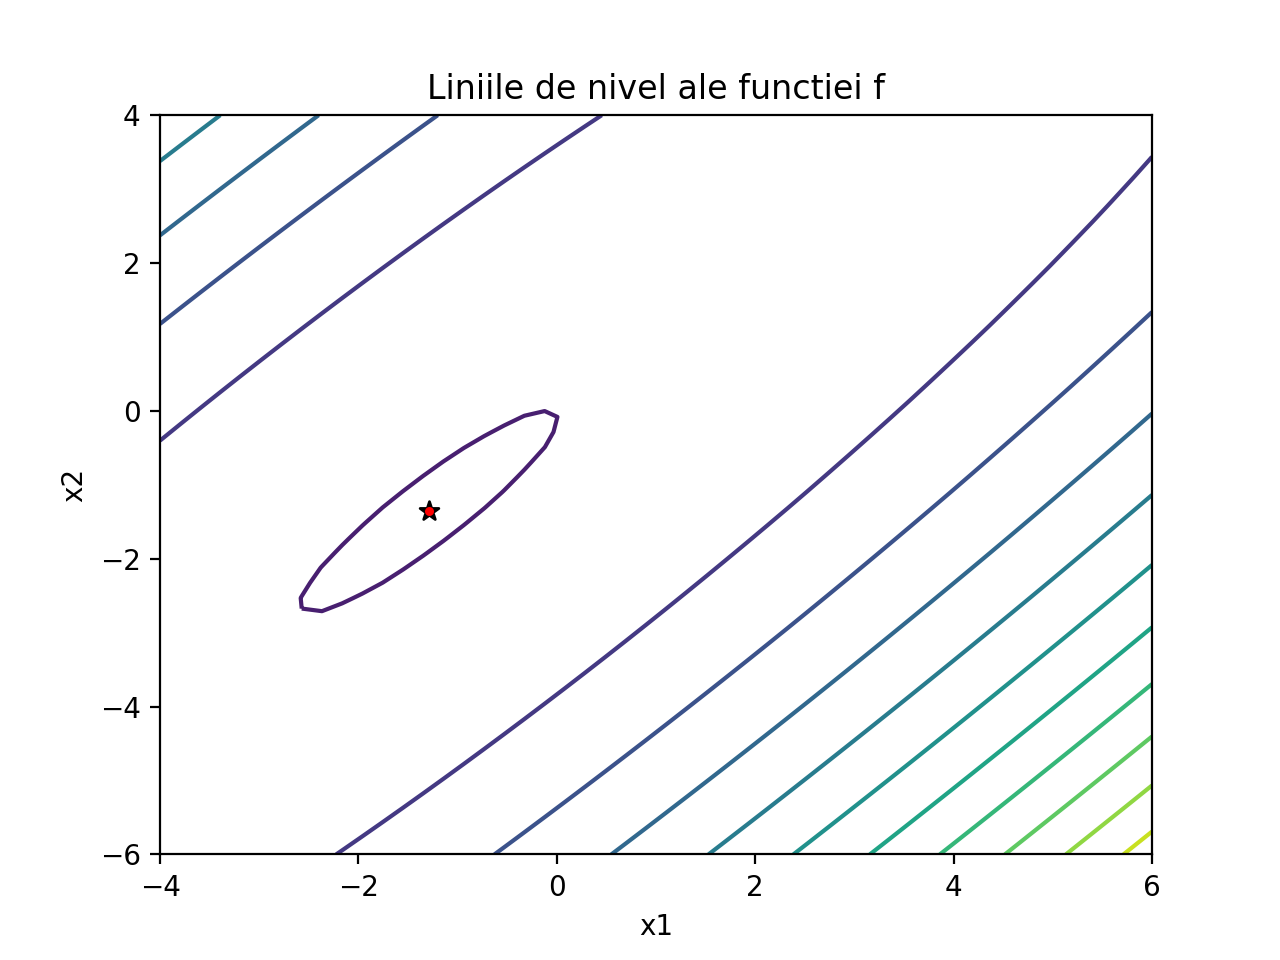

<IPython.core.display.Javascript object>


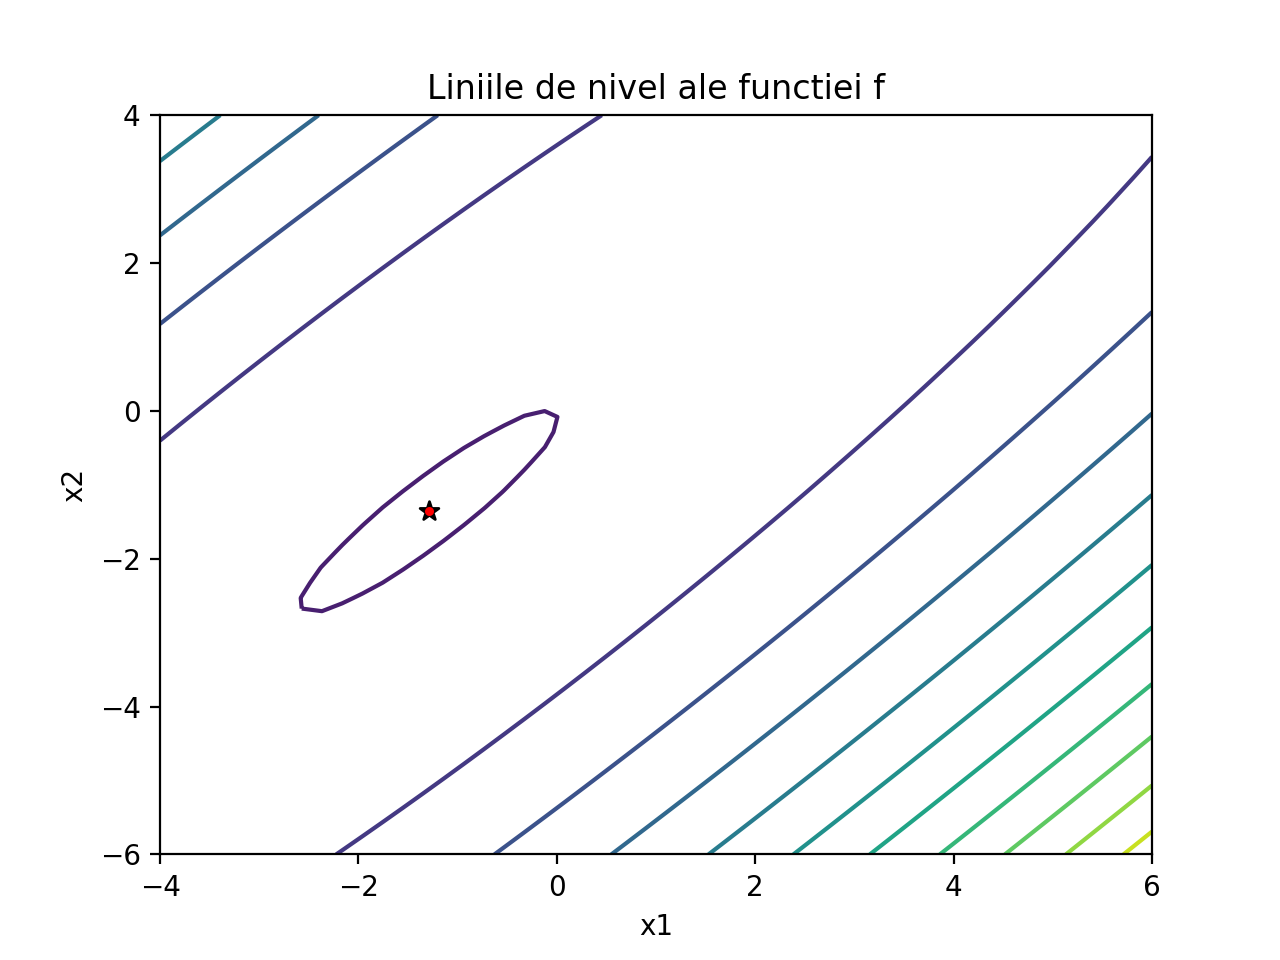

<IPython.core.display.Javascript object>


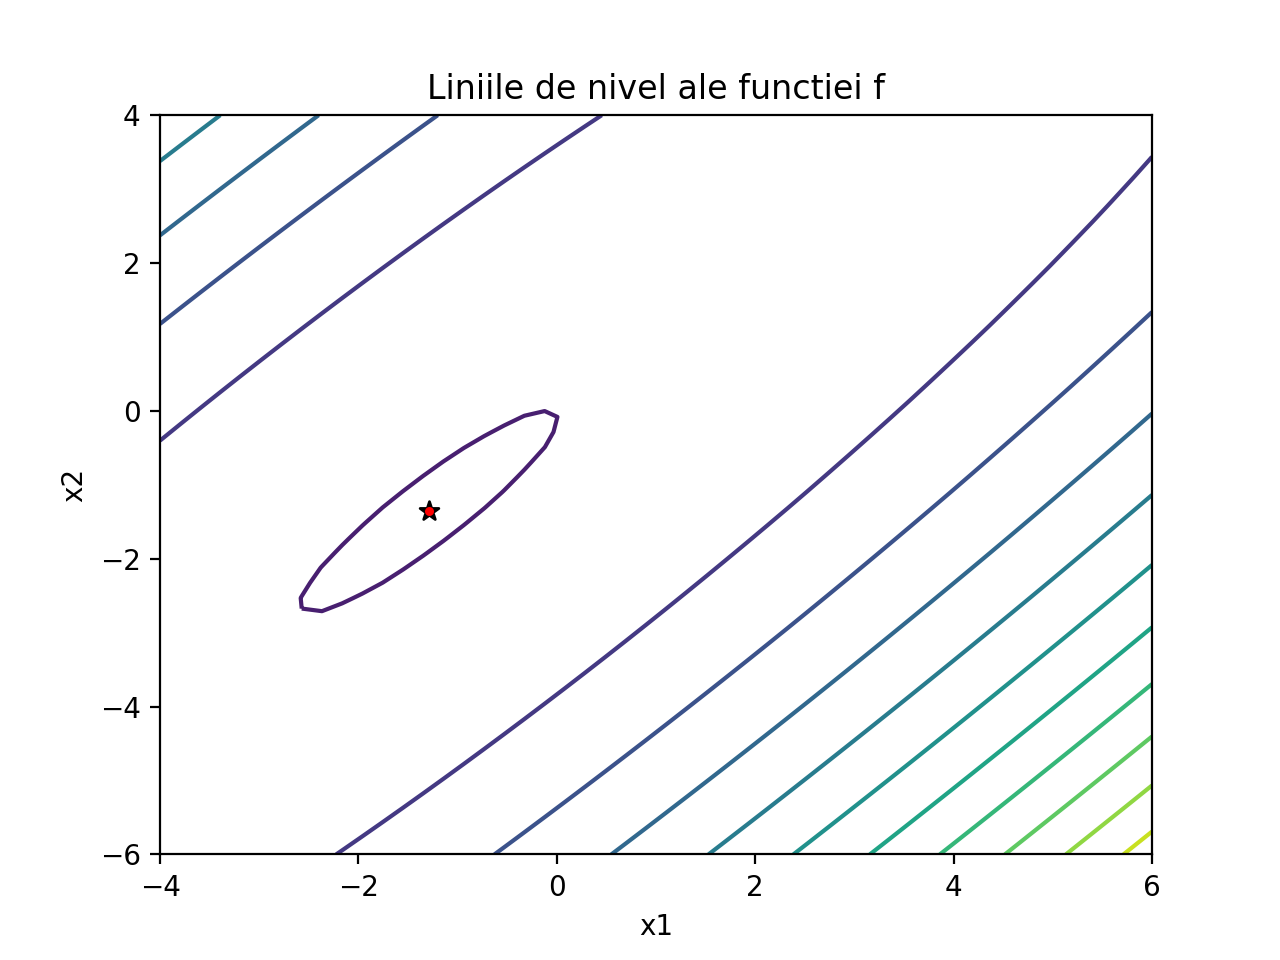

<IPython.core.display.Javascript object>


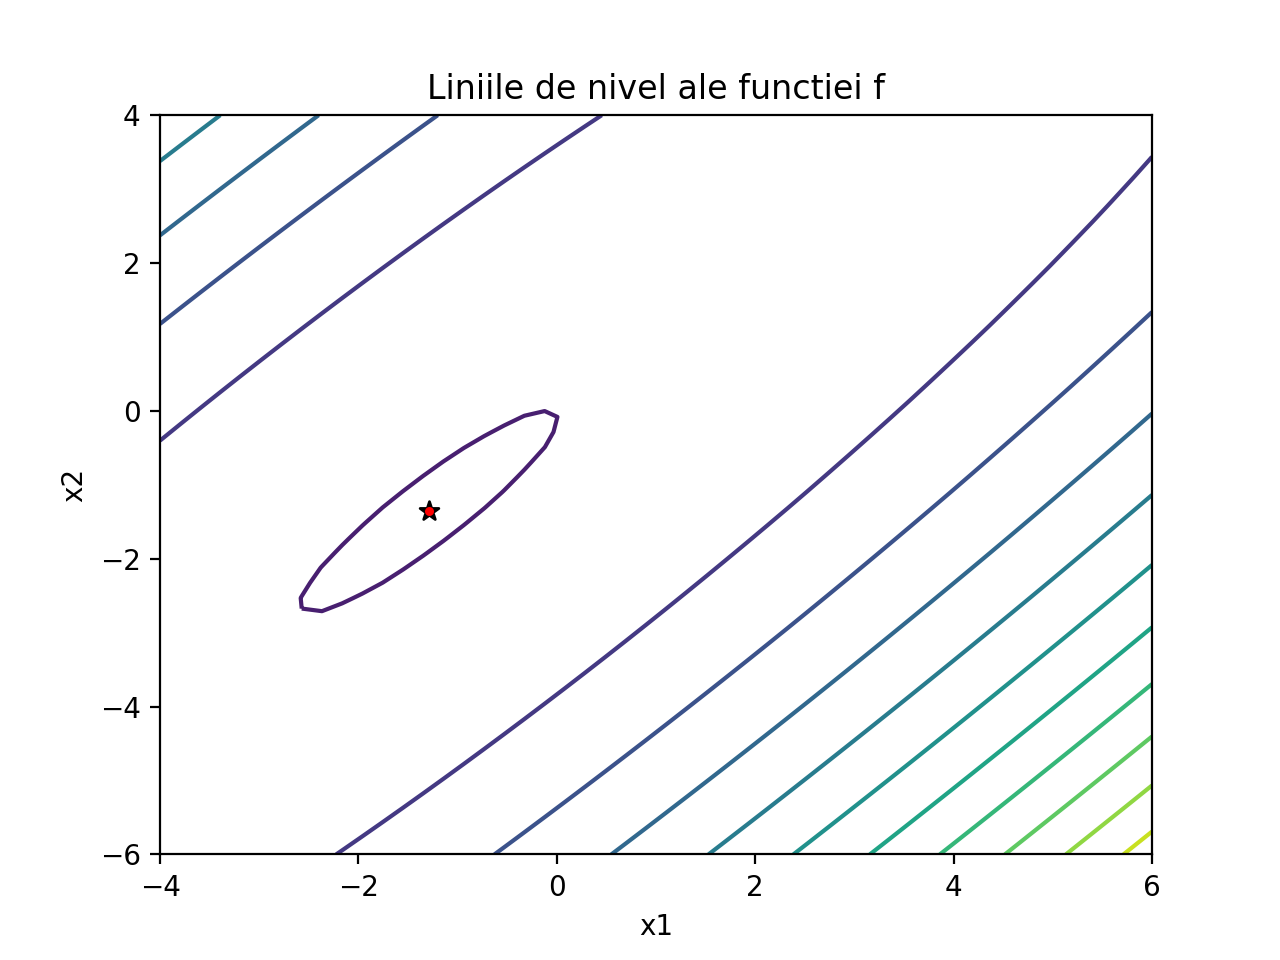

<IPython.core.display.Javascript object>


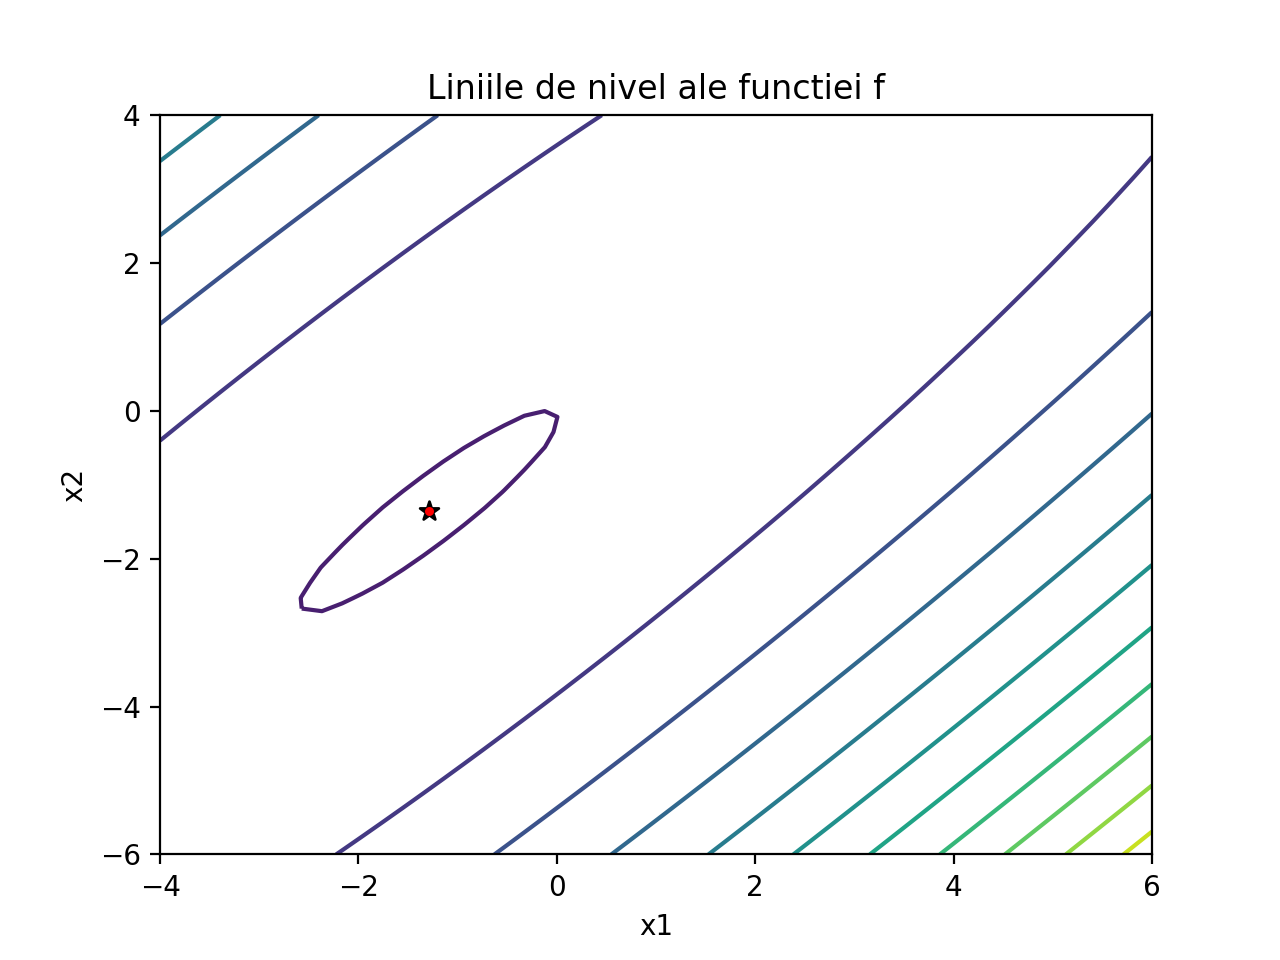

<IPython.core.display.Javascript object>


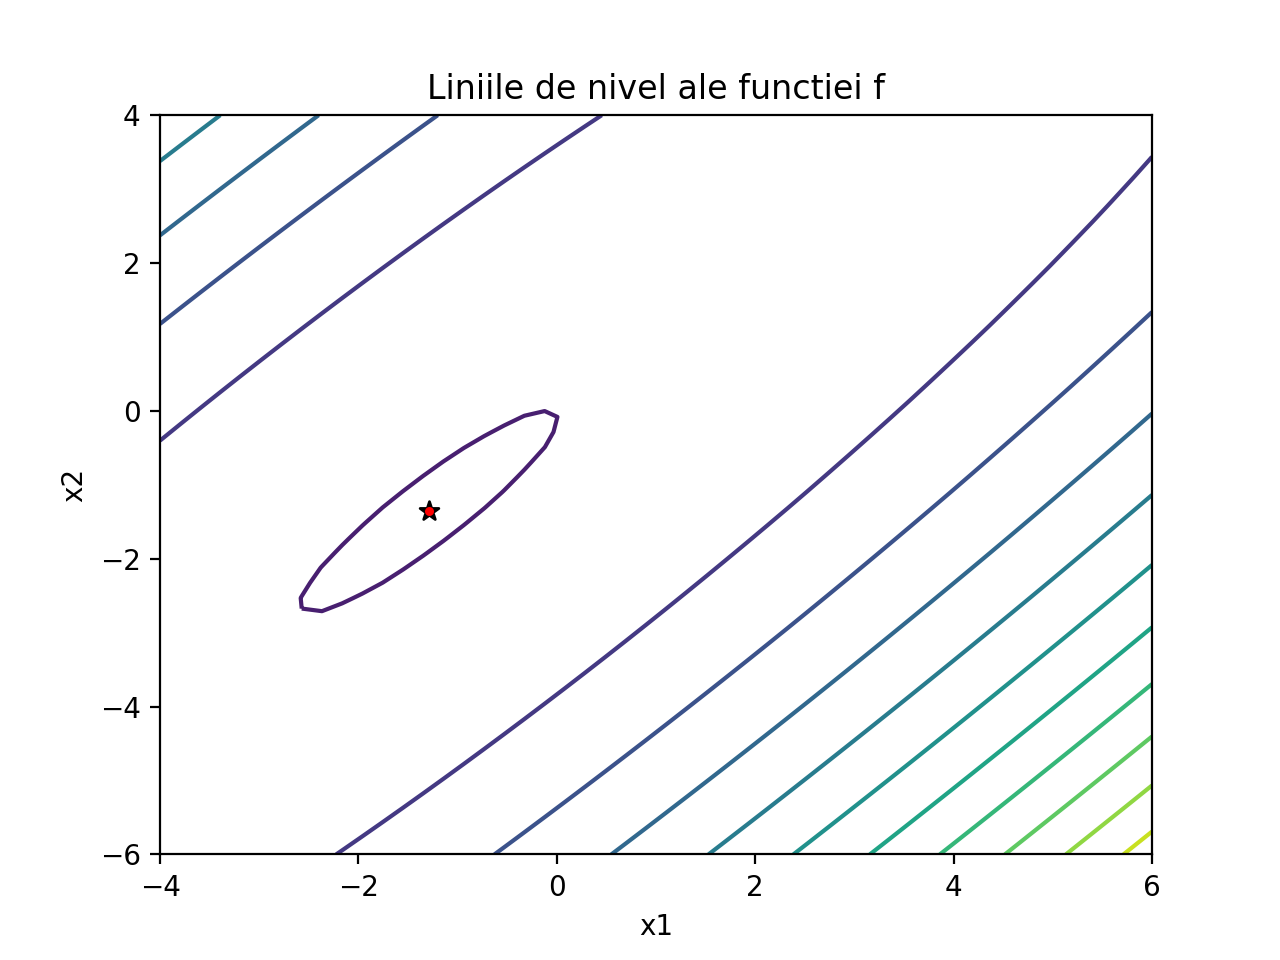

<IPython.core.display.Javascript object>


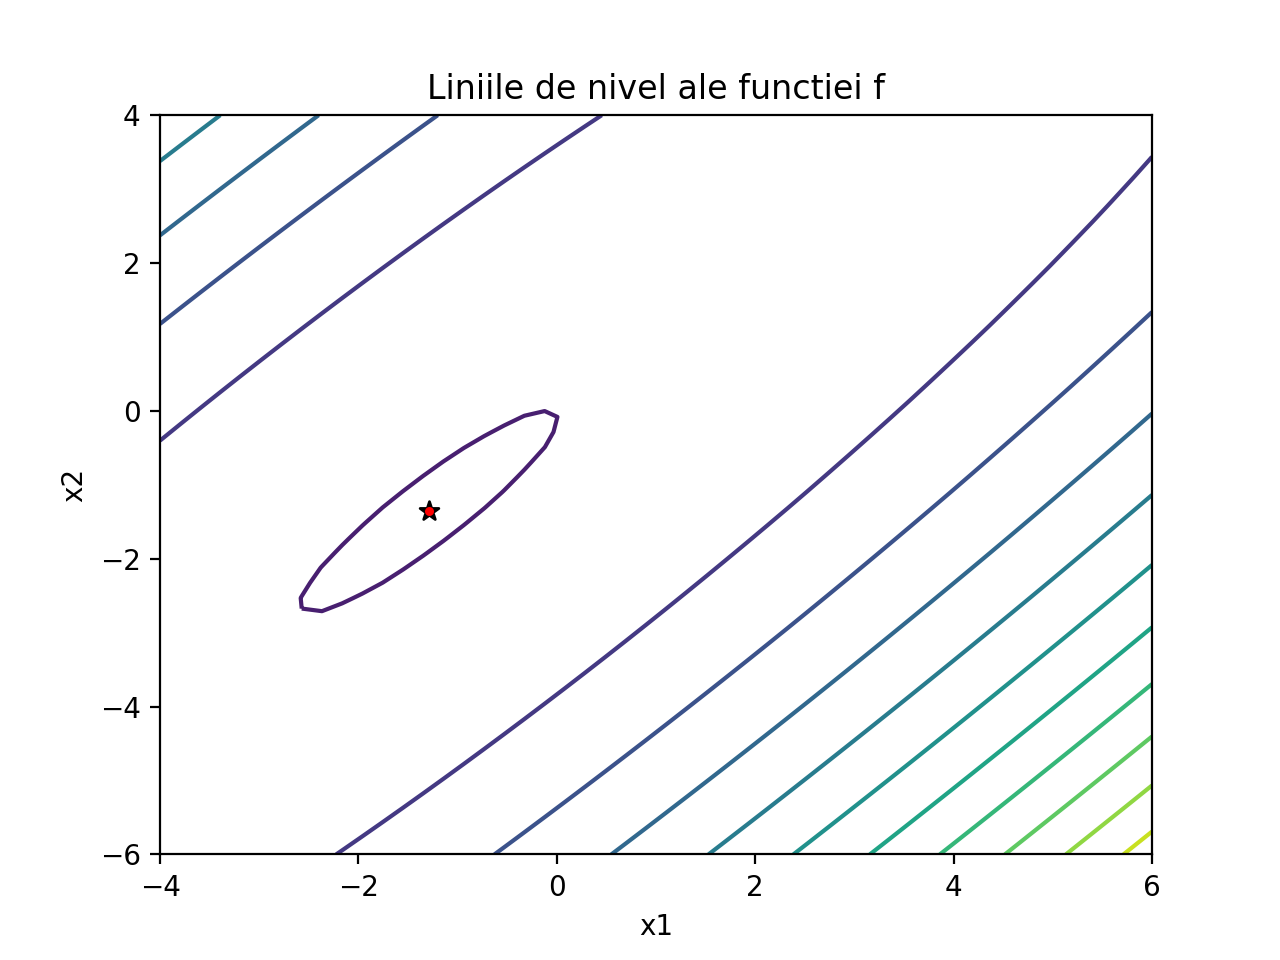

<IPython.core.display.Javascript object>


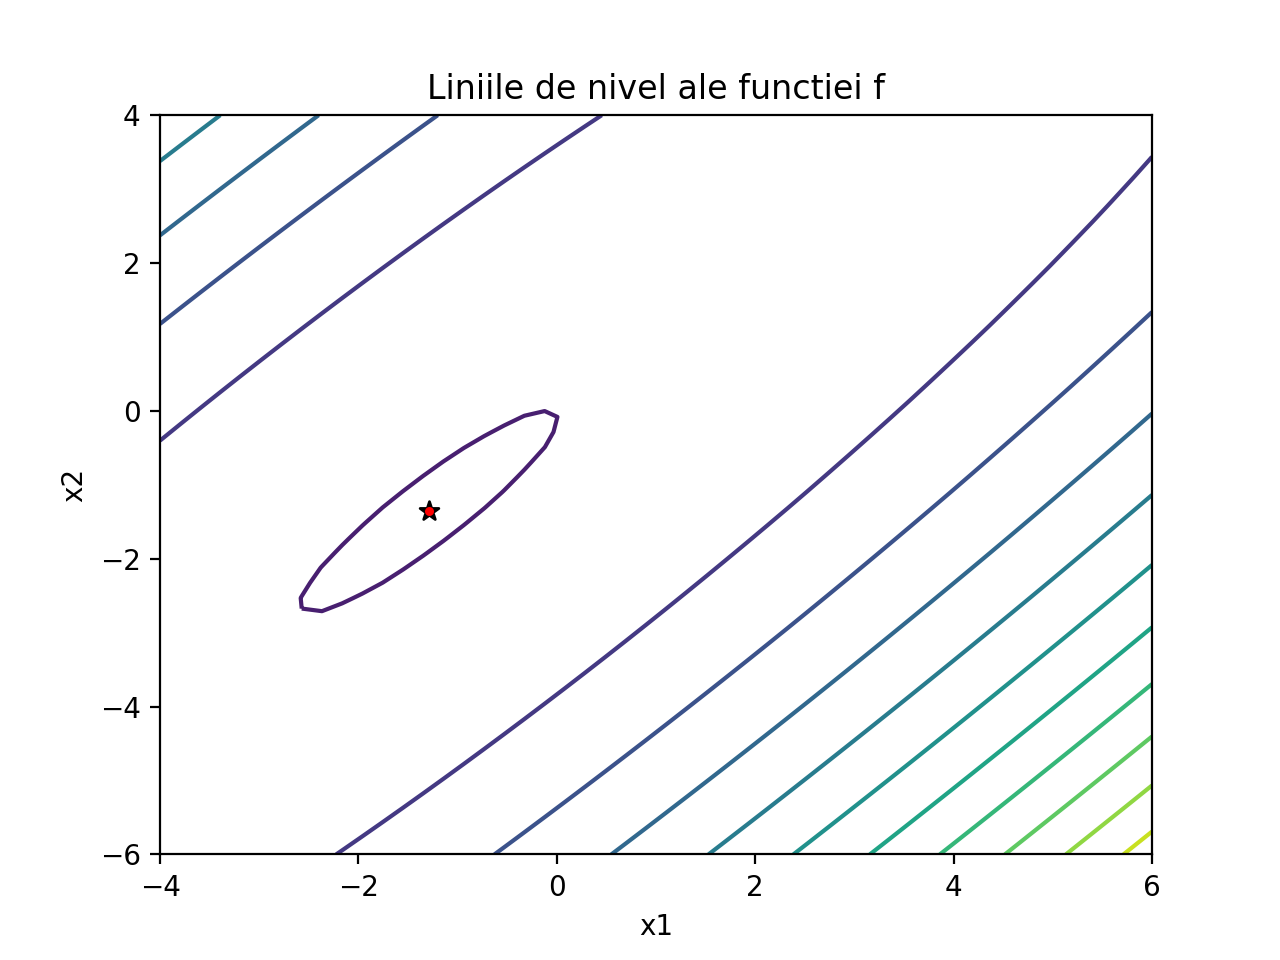

In [2]:
def grid_discret(A, b):
    """
    Construieste un grid discret si evaleaza f in fiecare punct al gridului
    """
    
    size = 50 # Numar de puncte pe fiecare axa
    x1 = np.linspace(-4, 6, size) # Axa x1
    x2 = np.linspace(-6, 4, size) # Axa x2
    X1, X2 = np.meshgrid(x1, x2) # Creeaza un grid pe planul determinat de axele x1 si x2

    X3 = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.array([X1[i,j], X2[i,j]]) # x e vectorul ce contine coordonatele unui punct din gridul definit mai sus
            X3[i,j] = .5 * x @ A @ x - x @ b # Evaluam functia in punctul x
            
    return X1, X2, X3

def grafic_f(A,b):
    """
    Construieste graficul functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)

    # Defineste o figura 3D
    fig1 = plt.figure()
    ax = plt.axes(projection="3d")

    # Construieste graficul functiei f folosind gridul discret X1, X2, X3=f(X1,X2)
    ax.plot_surface(X1, X2, X3, rstride=1, cstride=1, cmap='winter', edgecolor='none')

    # Etichete pe axe
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1,x2)')

    # Titlu
    ax.set_title('Graficul functiei f');

    # Afiseaza figura
    plt.show()
    
def linii_nivel(A,b):
    """
    Construieste liniile de nivel ale functiei f
    """
    
    # Construieste gridul asociat functiei
    (X1, X2, X3) = grid_discret(A, b)
    
    # Ploteaza liniile de nivel ale functiei f
    fig2 = plt.figure()
    plt.contour(X1, X2, X3, levels = 10) # levels = numarul de linii de nivel
    
    # Etichete pe axe
    plt.xlabel('x1')
    plt.ylabel('x2')
    
    # Titlu
    plt.title('Liniile de nivel ale functiei f');
    
    # Afiseaza figura
    plt.show()
        
# Definire functie f prin matricea A si vectorul b
A = np.array([[64,-56],[-56,58]])
b = np.array([-6,-7])
x = np.array([0,0])

# Apelare functii grafic
grafic_f(A,b)

# Punctul de minim determinat prin rezolvarea sistemului A*x=b, folosind metoda Pasului Descendent
x_num, x_steps = pas_descendent(A,b,x)
for step in x_steps:
    linii_nivel(A,b)
    plt.scatter(x_num[0], x_num[1], s=50, c='black', marker='*')
    plt.scatter(step[0], step[1], s = 5, c='red', marker='o')
plt.show()

In [3]:
def conjugate_gradient(A, b):
    # verific daca A este simetrica si pozitiv definita
    if (is_poz_def(A) == False) | (A != A.T).any():
        raise ValueError('Matricea A trebuie sa fie simetrica si pozitiv definita')
    r = b 
    k = 0
    x = np.zeros(A.shape[-1])
    # conditia de oprire
    while np.linalg.norm(r) > 1e-14 :
        x_steps = [x]
        if k == 0:
            p = r
        else: 
            gamma = - (p @ A @ r)/(p @ A @ p)
            p = r + gamma * p
        alpha = (p @ r) / (p @ A @ p)
        x = x + alpha * p
        r = r - alpha * (A @ p)
        k =+ 1
        
        if k > 1000:
            break
            
        # adaugam x la x_steps        
        x_steps.append(x)
        
    return x, x_steps

/Users/corinacondurachi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


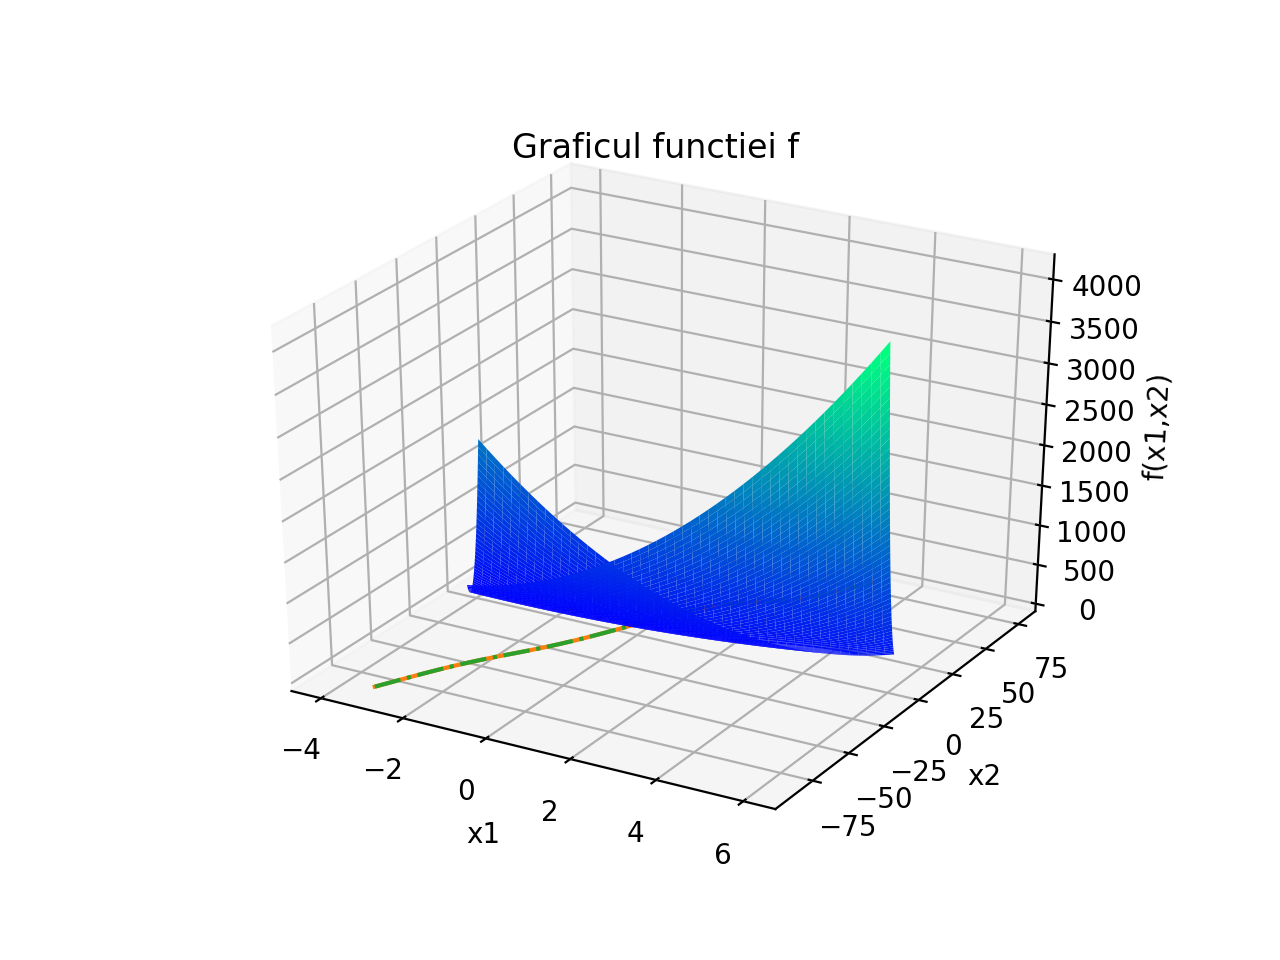

/Users/corinacondurachi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


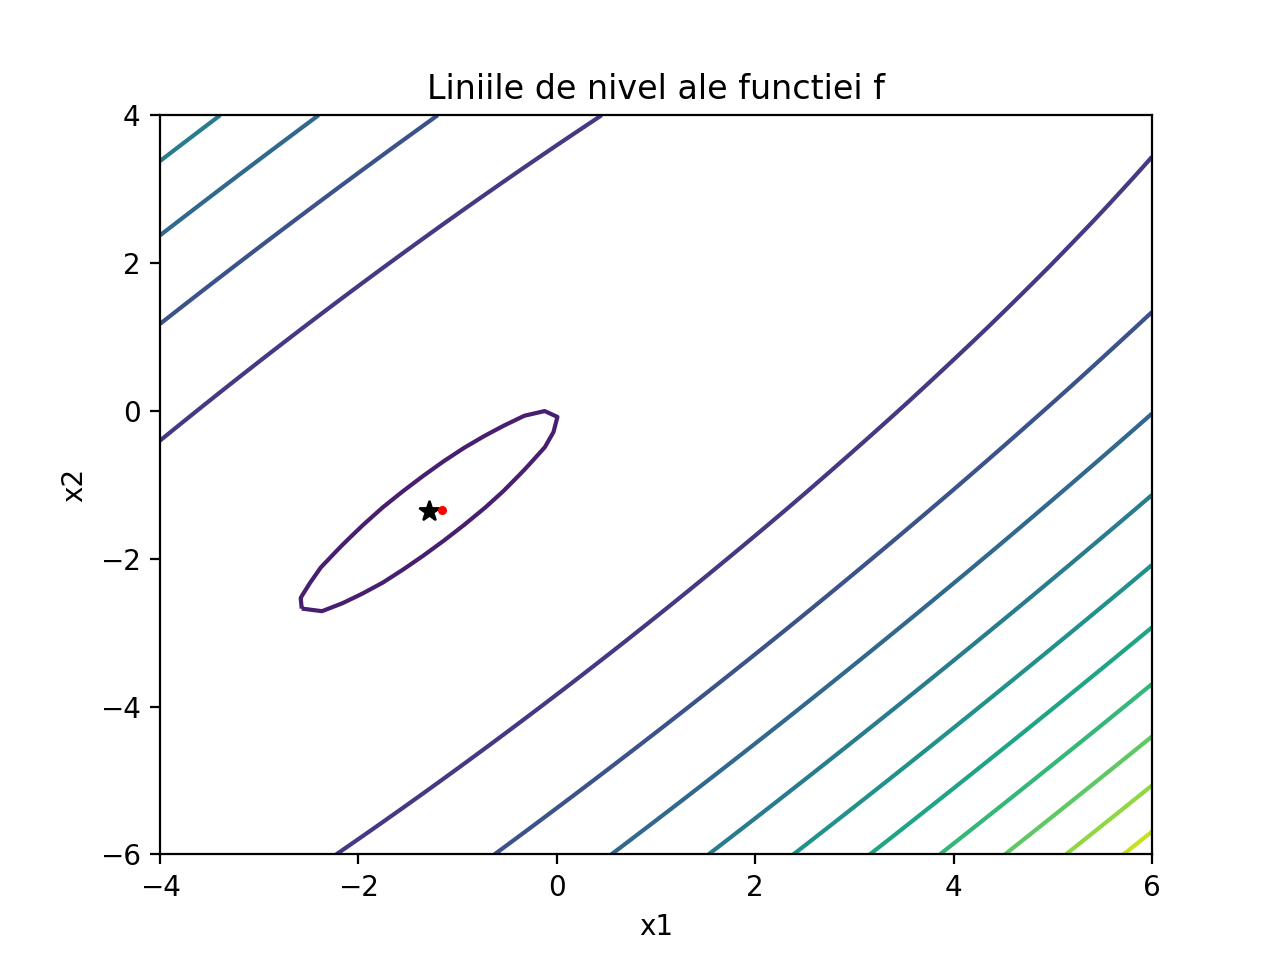

<IPython.core.display.Javascript object>


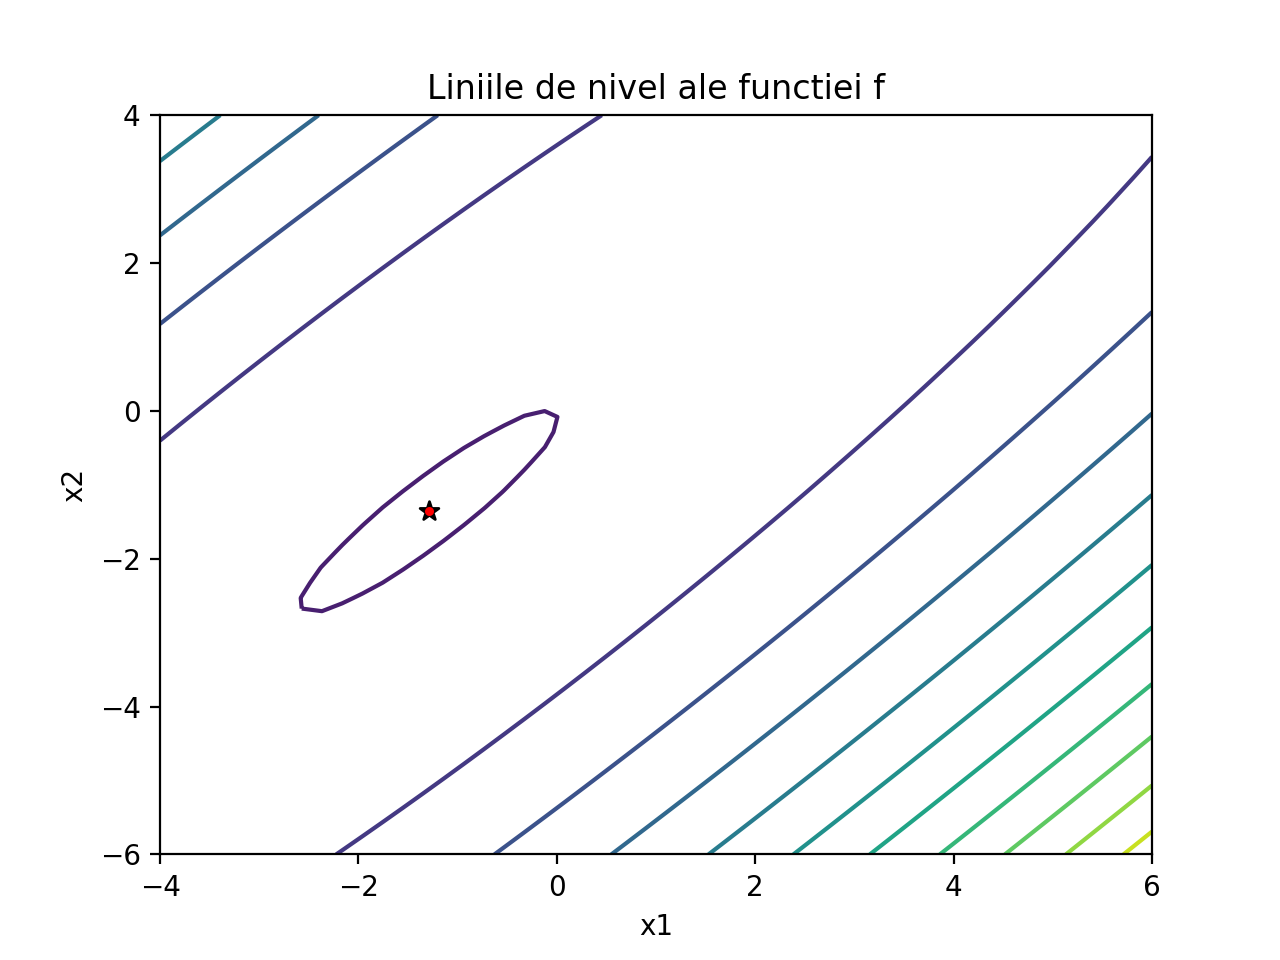

In [4]:
# Definire functie f prin matricea A si vectorul b
A = np.array([[64,-56],[-56,58]])
b = np.array([-6,-7])
x = np.array([0,0])

# Apelare functii grafic
grafic_f(A,b)

# Punctul de minim determinat prin rezolvarea sistemului A*x=b, folosind metoda Gradientilor Conjugati
# Metoda Gradientilor Conjugati este vizibil mai rapida decat Metoda Pasului Descendent
x_num, x_steps = conjugate_gradient(A,b)
for step in x_steps:
    linii_nivel(A,b)
    plt.scatter(x_num[0], x_num[1], s=50, c='black', marker='*')
    plt.scatter(step[0], step[1], s = 5, c='red', marker='o')
plt.show()
plt.close('all')

<IPython.core.display.Javascript object>


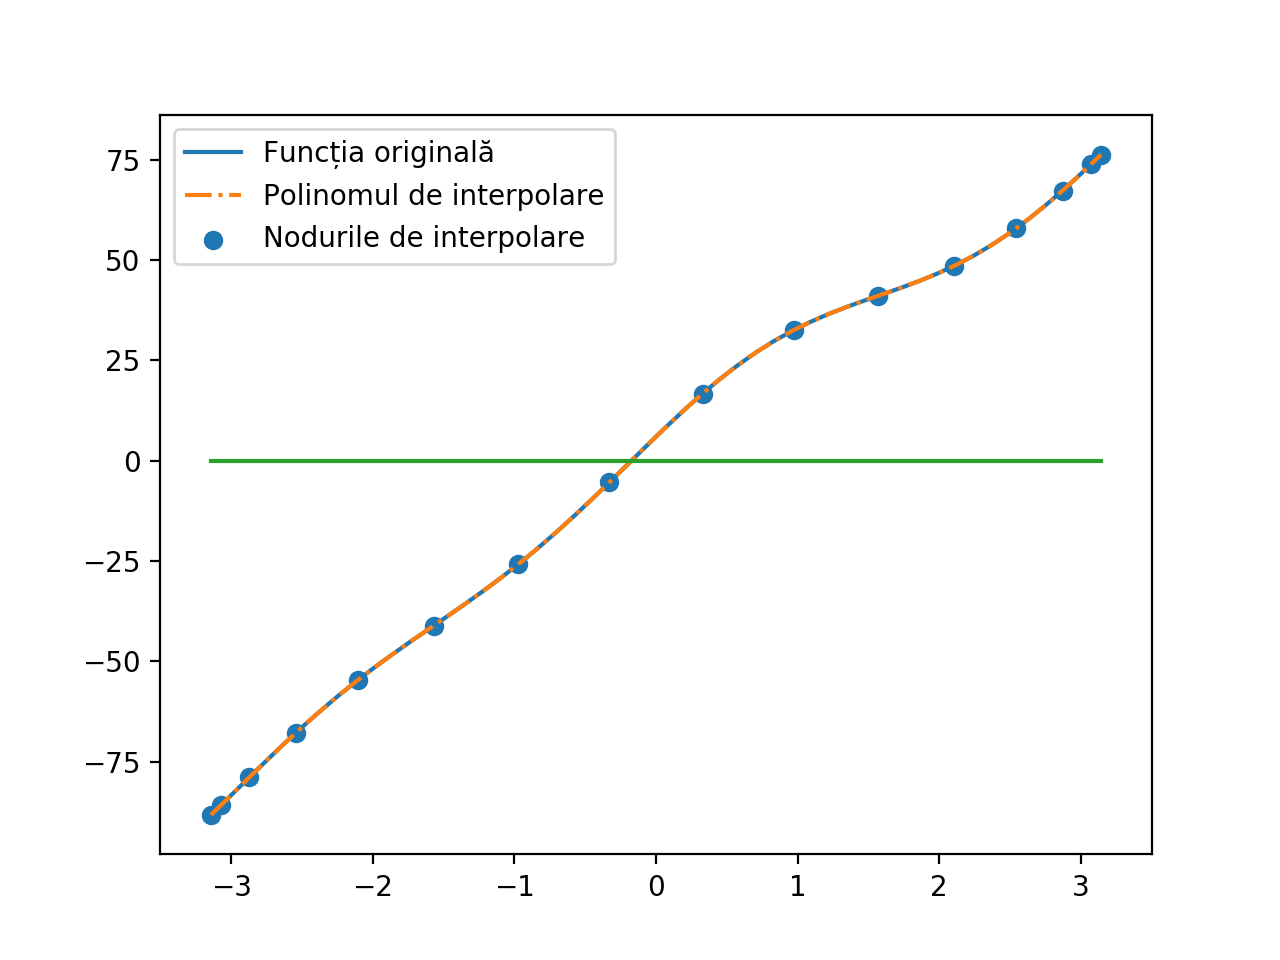

N a fost ales corect


In [7]:
#pb 2

import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 4 * np.sin(2 * x) + 6 * np.cos(x) + 26.19 * x

# cel mai mic N pentru care valoarea absoluta a eroarii de trunchiere <= 1e-5
N = 15

# Definesc capetele intervalelor
a = -np.pi
b = +np.pi

# folosesc poli Chobyshev deoarece altfel obtin erori mari la capete (eorarea > 1e-5)
def chebyshev(k):
    x = np.cos(np.pi * ((N - k) / N))
    return (a + b)/2 + ((b - a)/2) * x

x = np.array([chebyshev(k) for k in range(N + 1)])
y = f(x)


def compute_coefficient(k, t):
    
    # calculez valoarea coeficientilor termenului de ordin k in punctul t aplicand metoda Newton
    terms = []
    for i in range(N + 1):
        if i != k:
            terms.append((t - x[i])/(x[k] - x[i]))
    return np.prod(terms)

def evaluate_polynomial(t):
    s = 0
    for i in range(N + 1):
        s += compute_coefficient(i, t) * y[i]
    return s


# afisez graficul functiei, polinomul de interpolare, pecum si nodurile de interpolare
num_plot_points = 50
x_grafic = np.linspace(a, b, num_plot_points)
y_grafic = f(x_grafic)
y_interpolat = [evaluate_polynomial(t) for t in x_grafic]

plt.plot(x_grafic, y_grafic, label='Funcția originală')

plt.plot(x_grafic, y_interpolat, linestyle='-.', label='Polinomul de interpolare')

plt.scatter(x, y, label='Nodurile de interpolare')

plt.legend()
plt.show()

# calculez eroarea si verific daca eroarea in modul este <= 1e-5
def plot_truncation_error(y_real, y_approx):
    error = np.abs(y_real - y_approx)
    max_error = np.max(np.abs(error))
    # verific daca cea mai mare eroare este mai mare decat 1e-5, daca da, maresc N, daca nu, incerc cu un N mai mic 
    # pentru a-l gasi pe cel mai mic care respecta conditia data
    if max_error>1e-5:
        print ("Alegeti o valoare mai mare pentru N")
    else:
        print("N a fost ales corect")
    plt.plot(x_grafic, error)

# afisez graficul erorii de trunchiere    
plot_truncation_error(y_grafic, y_interpolat)
plt.show()

<IPython.core.display.Javascript object>


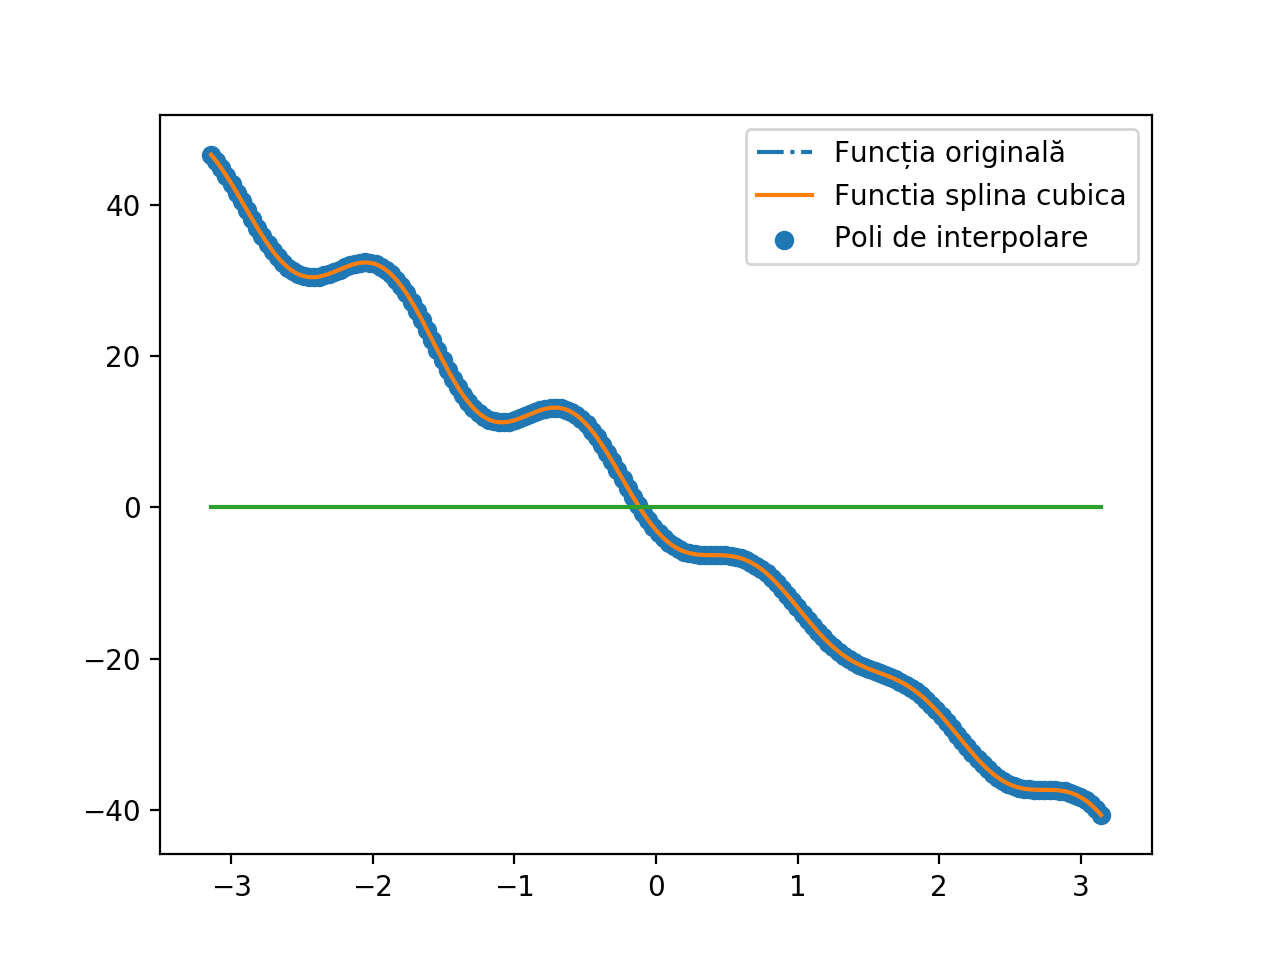

N a fost ales corect


In [5]:
# pb 3
import numpy as np
import matplotlib.pyplot as plt


# Definesc functia
def f(x):
    return (-2) * np.sin(4 * x) - 3 * np.cos(-5 * x) - 13.91 * x

# definesc derivata functiei
def f_derivat(x):
    return 15 * np.sin(5 * x) - 8 * np.cos(4 * x) - 13.91

# Definesc capetele intervalelor
left = -np.pi
right = np.pi

# cel mai mic N pentru care valoarea absoluta a eroarii de trunchiere <= 1e-5
N = 173

x = np.linspace(left, right, N + 1)
y = f(x)

# coeficientii a
a = y.copy()

B = np.zeros((N + 1, N + 1))

B[0, 0] = 1
for i in range(1, N):
    B[i, i - 1] = 1
    B[i, i] = 4
    B[i, i + 1] = 1
B[N, N] = 1

h = x[1] - x[0]

W = np.zeros((N + 1, 1))
W[0] = f_derivat(x[0])
for i in range(1, N):
    W[i] = 3 * (y[i + 1] - y[i - 1]) / h
W[N] = f_derivat(x[N])

# obtinem coeficientii b rezolvand sistemul de ecuatii
b = np.linalg.solve(B, W)

c = np.zeros(N)
d = np.zeros(N)

h_squared = h * h
h_cubed = h * h * h

for i in range(N):
    # obtinem coeficientii c si d
    c[i] = 3 * (y[i + 1] - y[i]) / h_squared - (b[i + 1] + 2 * b[i]) / h
    d[i] = - 2 * (y[i + 1] - y[i]) / h_cubed + (b[i + 1] + b[i]) / h_squared
    
# definesc functia care genereaza functii spline
def construct_spline(i):
    def spline(t):
        T = t - x[i]
        return a[i] + b[i] * T + c[i] * (T ** 2) + d[i] * (T ** 3)
    return spline

# reprezentarea grafica
num_plot_points = 500
x_grafic = np.linspace(left, right, num_plot_points)
y_grafic = f(x_grafic)

y_aproximat = np.piecewise(
    x_grafic,
    [
        (x[i] <= x_grafic) & (x_grafic < x[i + 1])
        for i in range(N - 1)
    ],
    [
        construct_spline(i)
        for i in range(N)
    ]
)

plt.plot(x_grafic, y_grafic, linestyle='-.', label='Funcția originală')
plt.plot(x_grafic, y_aproximat, label='Functia splina cubica')
plt.scatter(x, y, label='Poli de interpolare')

plt.legend()
plt.show()

# afisez graficul erorii de trunchiere
plot_truncation_error(y_grafic, y_aproximat)
plt.show()